In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:

%matplotlib inline

In [3]:
cd /Users/xpandachuy/Projects/kaggle/EEG_Detection_Grasp_Lift/

/Users/xpandachuy/Projects/kaggle/EEG_Detection_Grasp_Lift


In [4]:
series = pd.read_csv('train/subj10_series1_data.csv', index_col=0)
print(series.head())

                  Fp1  Fp2   F7   F3   Fz   F4   F8  FC5  FC1  FC2  ...    P7  \
id                                                                  ...         
subj10_series1_0 -304 -156 -411 -640 -505 -603 -451  104 -344 -784  ...  -197   
subj10_series1_1 -300 -151 -376 -670 -509 -622 -422   60 -374 -815  ...  -203   
subj10_series1_2 -286 -227 -400 -724 -525 -631 -469   70 -378 -811  ...  -176   
subj10_series1_3 -281 -272 -447 -702 -540 -640 -492   71 -386 -807  ...  -154   
subj10_series1_4 -294 -194 -432 -693 -503 -609 -500  109 -385 -797  ...  -146   

                   P3   Pz   P4  P8  PO9   O1   Oz   O2  PO10  
id                                                             
subj10_series1_0 -597 -242 -472 -56 -338 -335 -518 -371  -177  
subj10_series1_1 -611 -224 -471 -53 -310 -326 -511 -396  -189  
subj10_series1_2 -608 -234 -475 -78 -282 -289 -505 -424  -193  
subj10_series1_3 -605 -246 -488 -73 -304 -337 -539 -412  -192  
subj10_series1_4 -602 -226 -448 -25 -342 -333 -5

In [5]:
events = pd.read_csv('train/subj10_series1_events.csv', index_col=0)
print(events.head())

                  HandStart  FirstDigitTouch  BothStartLoadPhase  LiftOff  \
id                                                                          
subj10_series1_0          0                0                   0        0   
subj10_series1_1          0                0                   0        0   
subj10_series1_2          0                0                   0        0   
subj10_series1_3          0                0                   0        0   
subj10_series1_4          0                0                   0        0   

                  Replace  BothReleased  
id                                       
subj10_series1_0        0             0  
subj10_series1_1        0             0  
subj10_series1_2        0             0  
subj10_series1_3        0             0  
subj10_series1_4        0             0  


In [6]:
# are there overlapping classes?
sum_events = events.sum(axis=1)

# if a row in the events data frame has sum greater than one,
# it means that more than one action is recorded at the same time
print("Number of rows where two events are happen simultaneously:", len(sum_events[sum_events == 2]))
print("Number of rows where three events are happen simultaneously:", len(sum_events[sum_events == 3]))
print("Number of rows where four events are happen simultaneously:", len(sum_events[sum_events == 4]))

Number of rows where two events are happen simultaneously: 3774
Number of rows where three events are happen simultaneously: 0
Number of rows where four events are happen simultaneously: 0


In [7]:
# let's convert the events data frame to a single vector of events
# the encoding is the following
# 0: no action occurrs
# 1: HandStart
# 2: FirstDigitTouch
# 3: BothStartLoadPhase
# 4: LiftOff
# 5: Replace
# 6: BothReleased
# NOTE: What do we do with the overlapping classes?
# For now, I'm just going to take the first label
# For example, if 'BothStartLoadPhase' and 'Replace' are both 1 in one row,
# the row looks like [0, 0, 0, 1, 1, 0], but I will say that the label for
# the row is just 3 (BothStartLoadPhase)
num_samples = len(events)
labels = np.zeros(num_samples) # start with an array of all zeros
non_zero = np.any(events.values > 0, axis=1) # get a Boolean array indicating which rows have at least one 1
# the class label is the one plus the index of the first occurrence of 1
labels[non_zero] = (np.argmax(events.values, axis=1)[non_zero] + 1) 

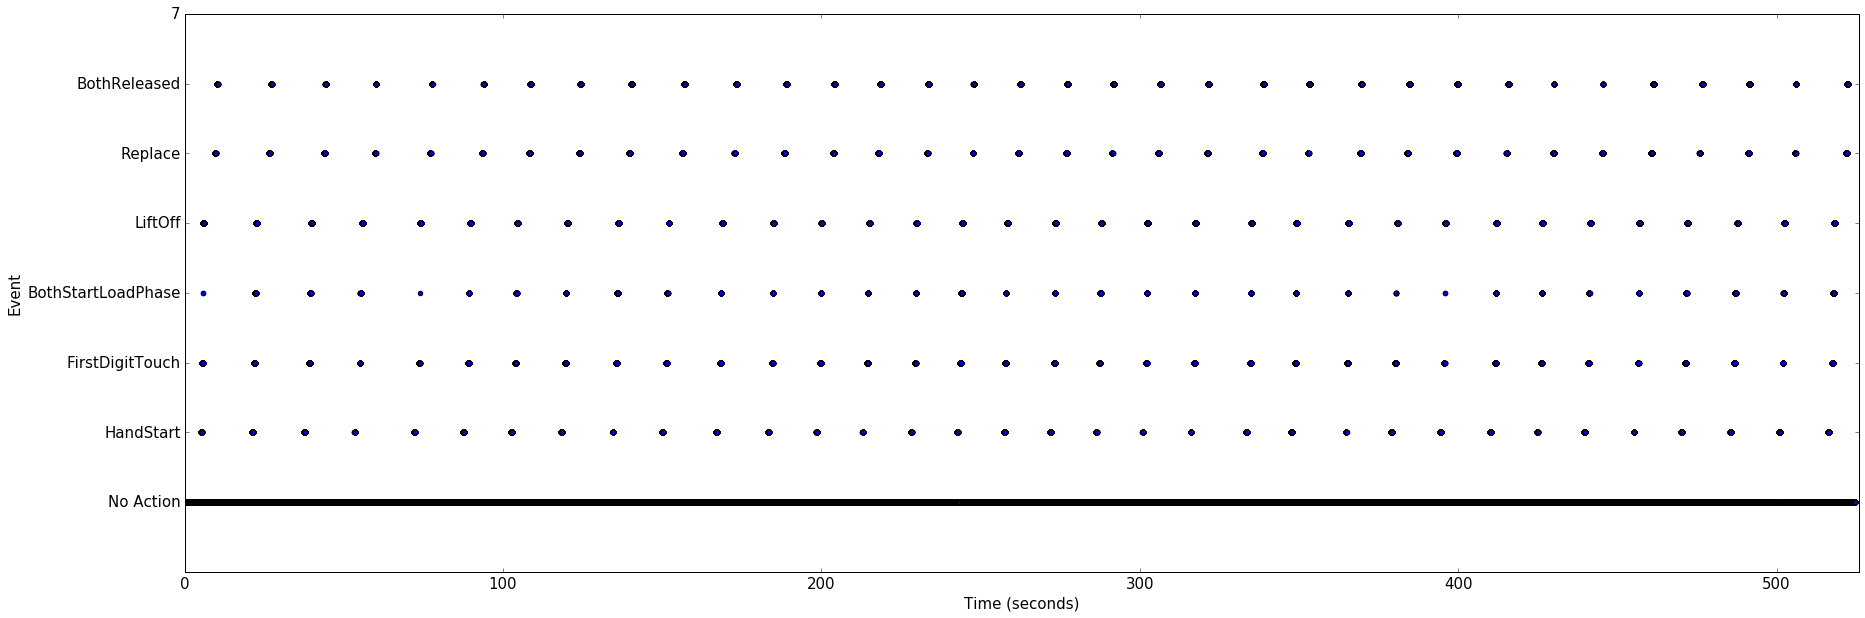

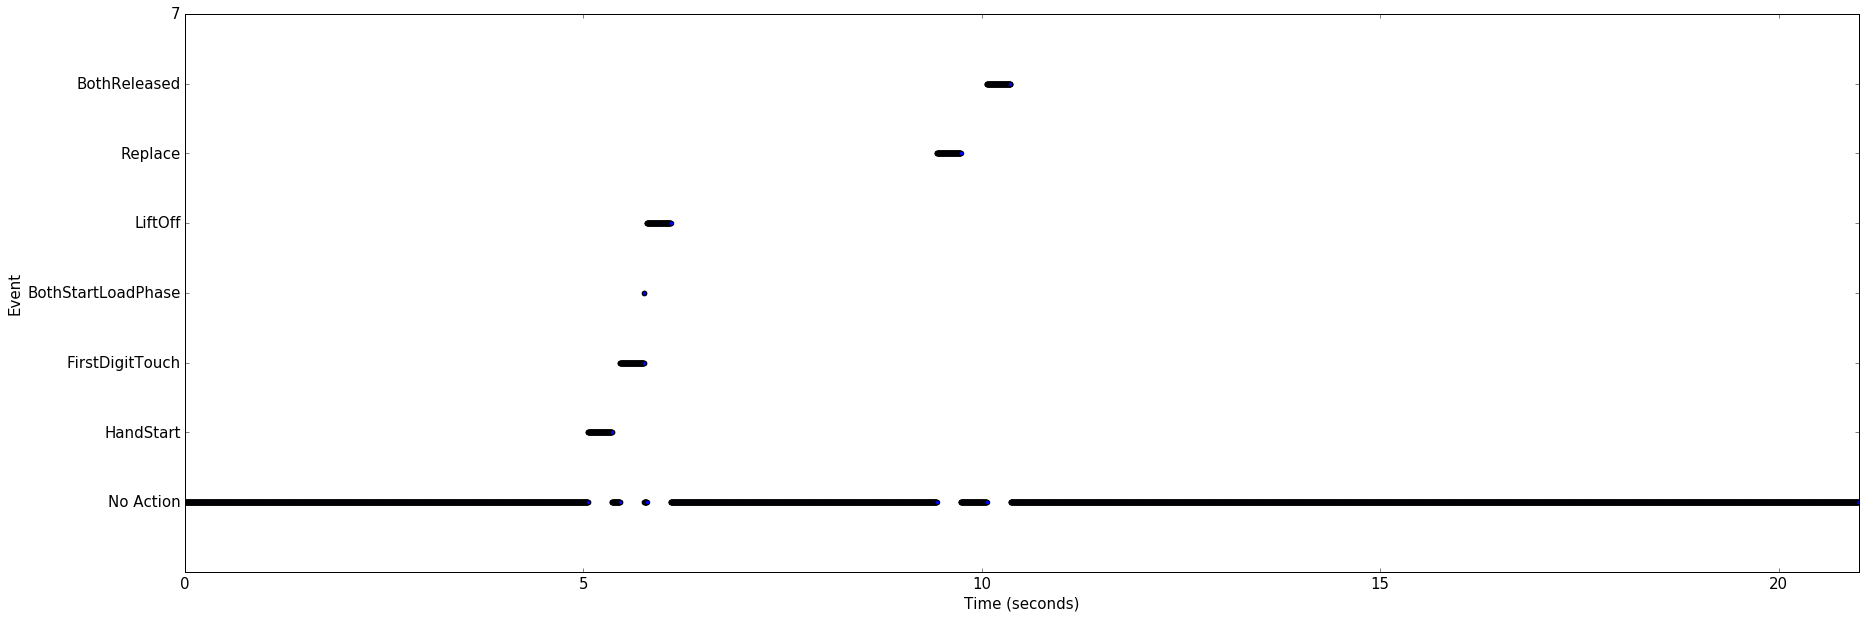

In [8]:
# OK. Let's plot it
sampling_rate = 500.
# prepare the x-axis. We divide by the sampling rate to get time in seconds
x_axis = np.arange(num_samples) / sampling_rate

# make font bigger
matplotlib.rcParams.update({'font.size': 15})

# full time series
fig = plt.gcf()
fig.set_size_inches((30, 10))
plt.scatter(x_axis, labels)
plt.xlabel('Time (seconds)')
plt.ylabel('Event')
plt.xlim(0, x_axis[-1] + 1)
locations = range(8)
names = ["No Action", "HandStart", "FirstDigitTouch", "BothStartLoadPhase", "LiftOff", "Replace", "BothReleased", "7"]
plt.yticks(locations, names)
plt.show()
plt.close()

# the first 21 seconds
fig = plt.gcf()
fig.set_size_inches((30, 10))
plt.scatter(x_axis[:10500], labels[:10500])
plt.xlabel('Time (seconds)')
plt.ylabel('Event')
plt.yticks(locations, names)
plt.xlim(0, 21)
plt.show()
plt.close()


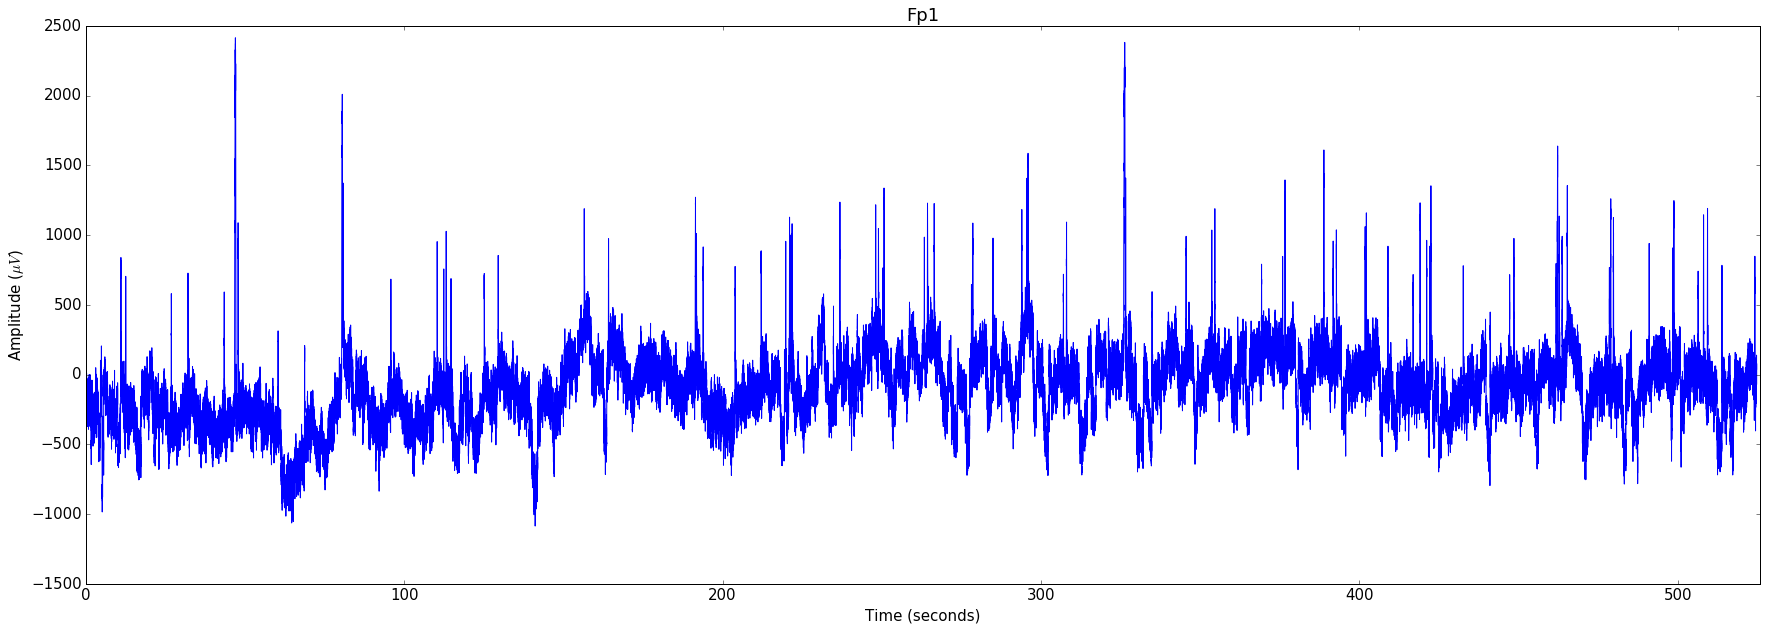

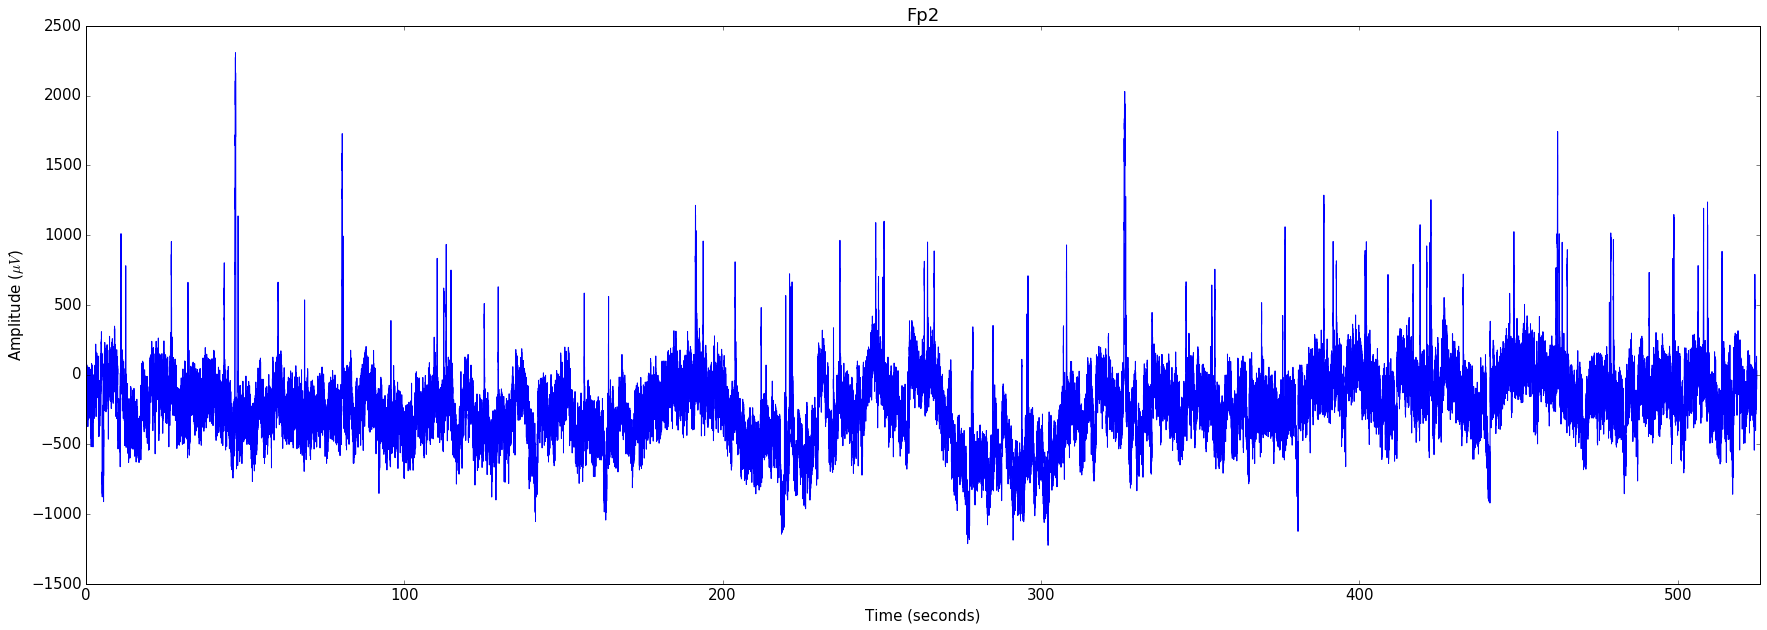

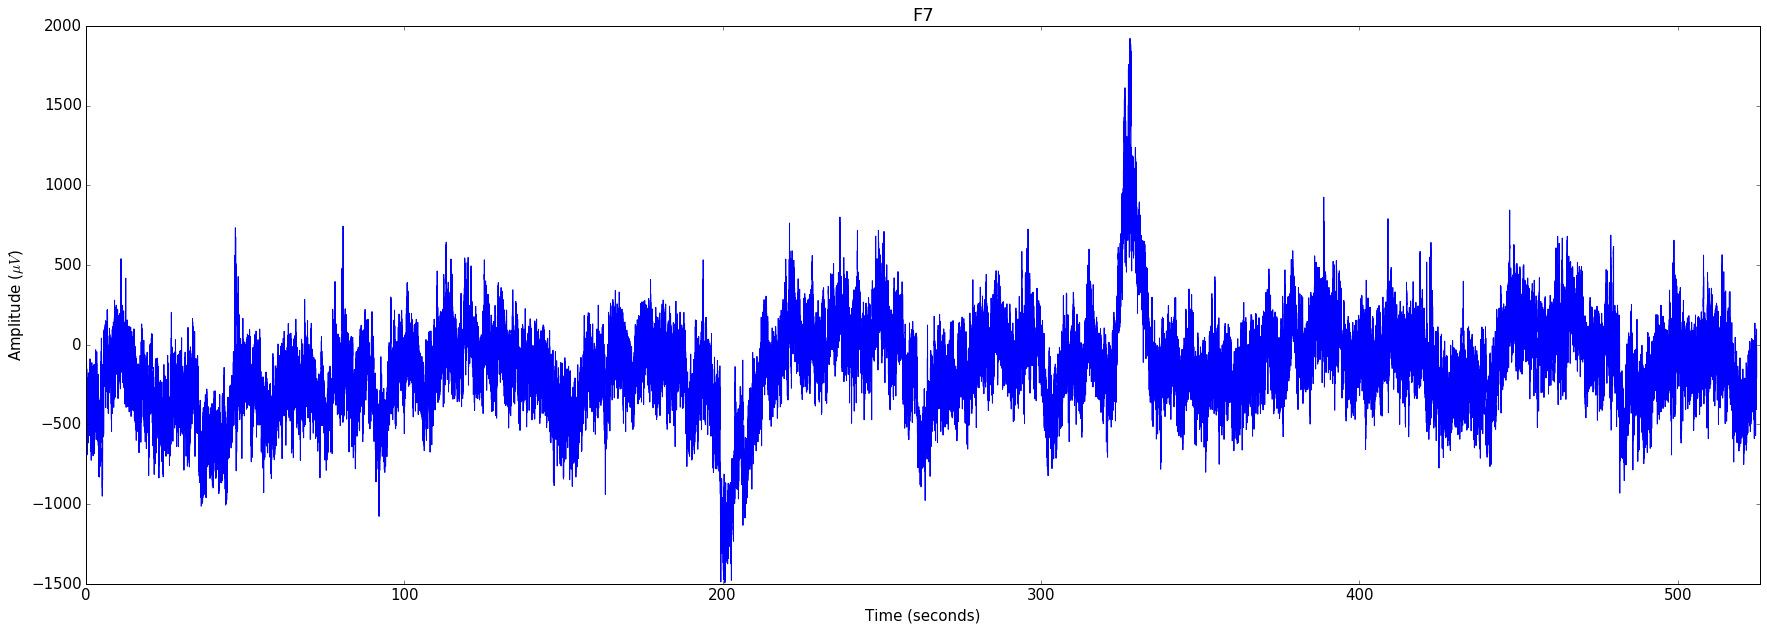

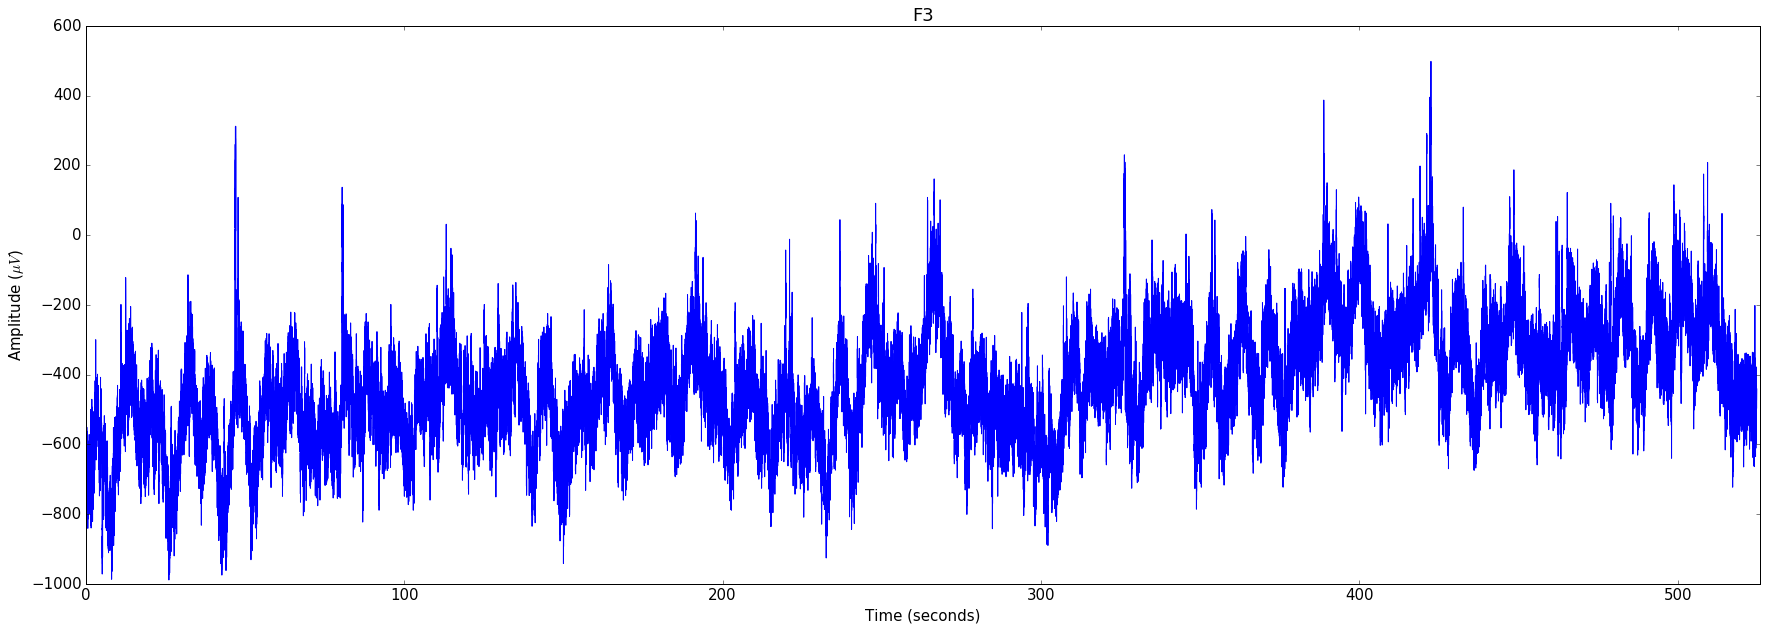

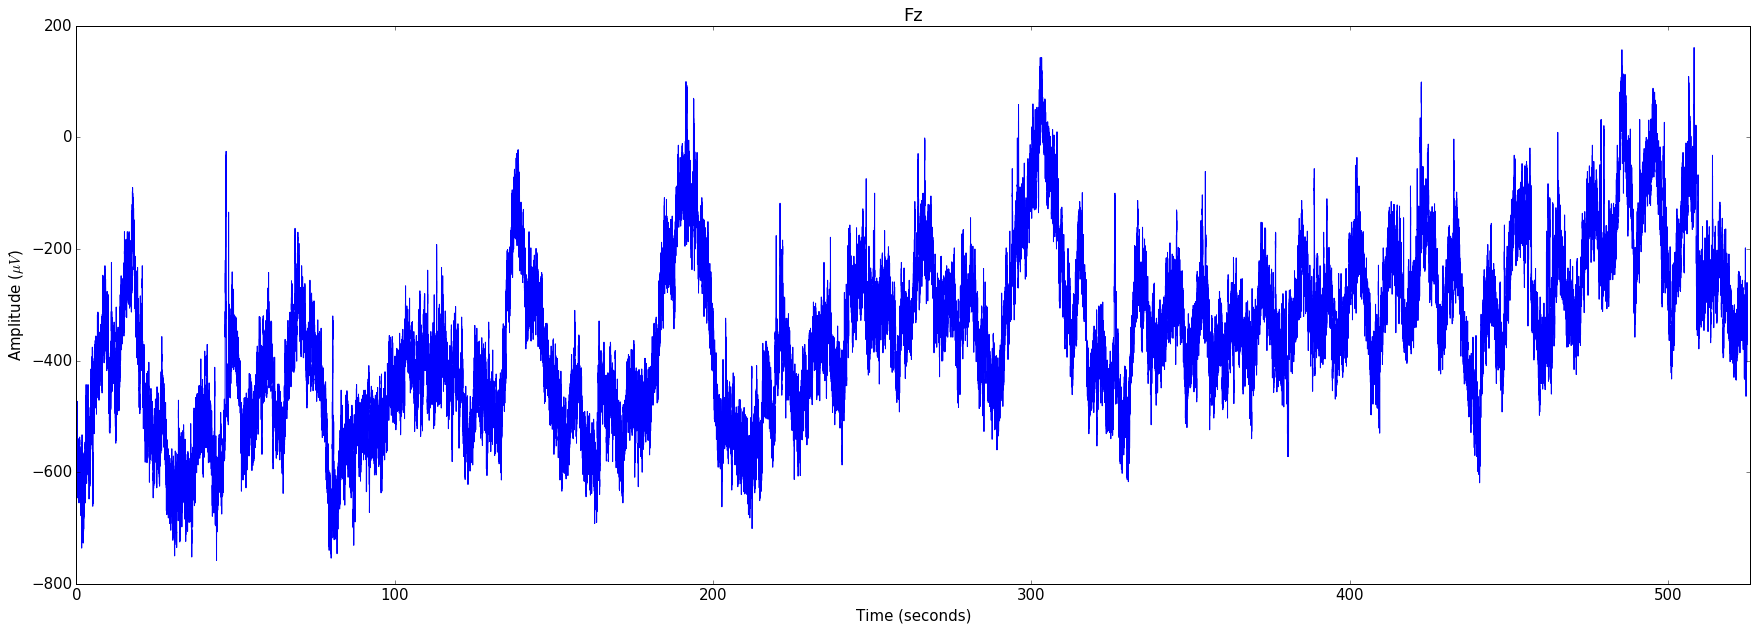

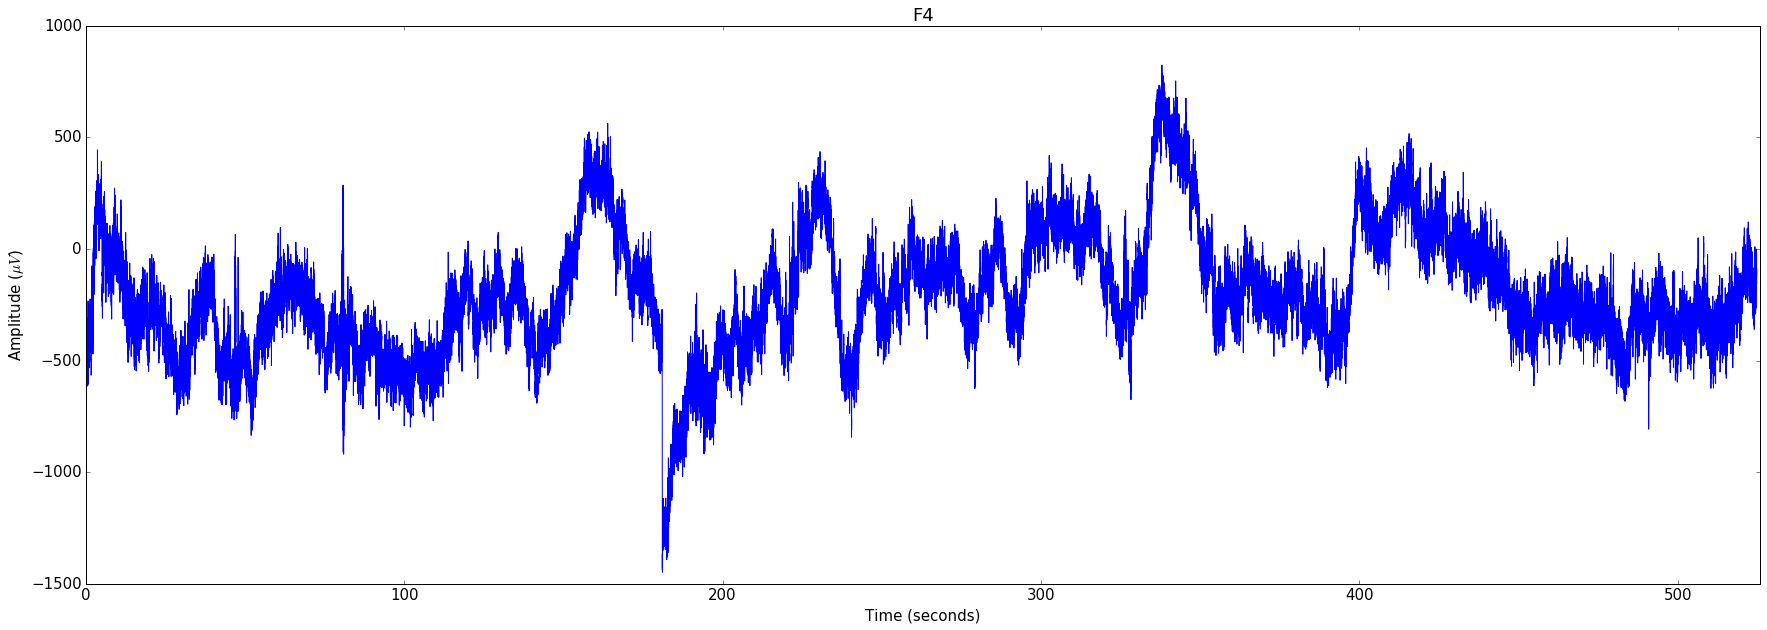

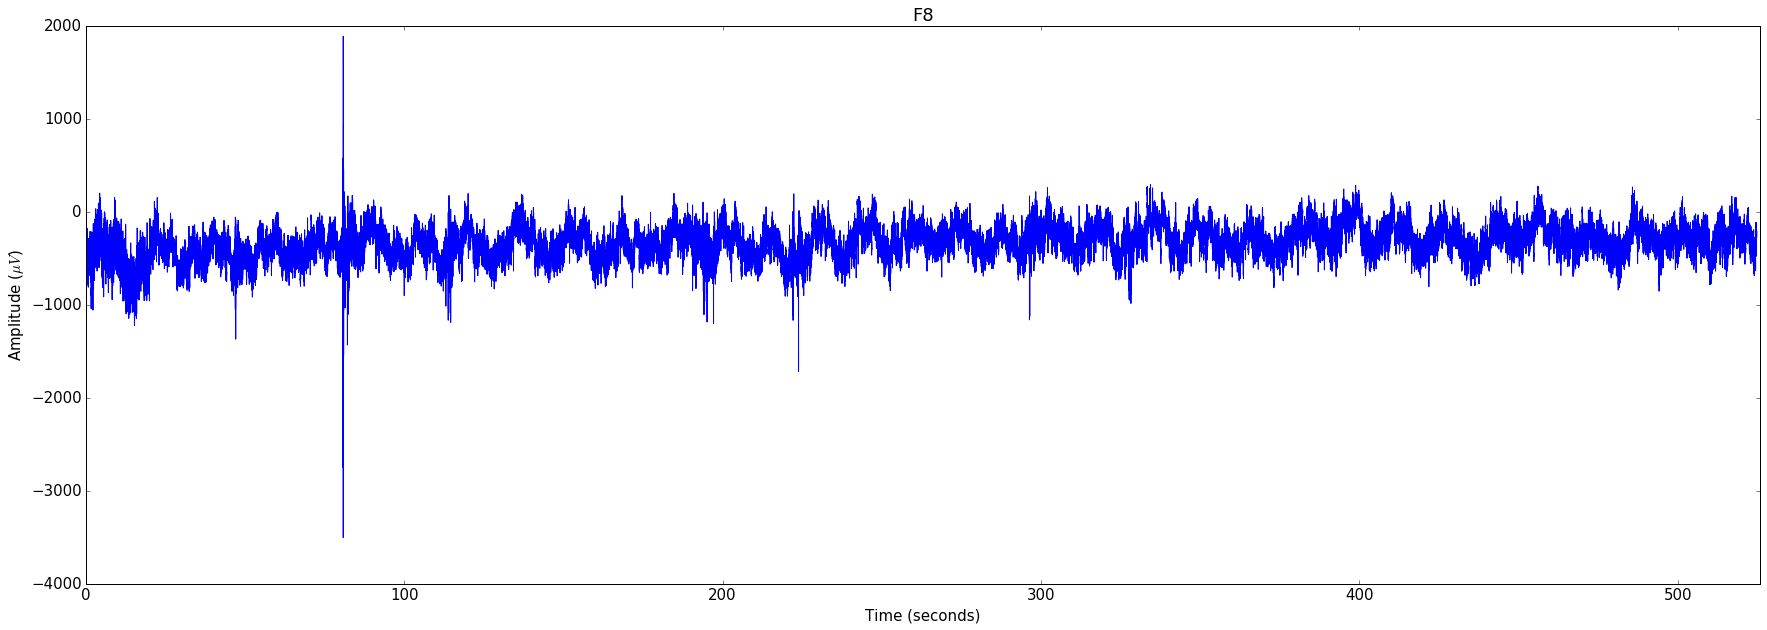

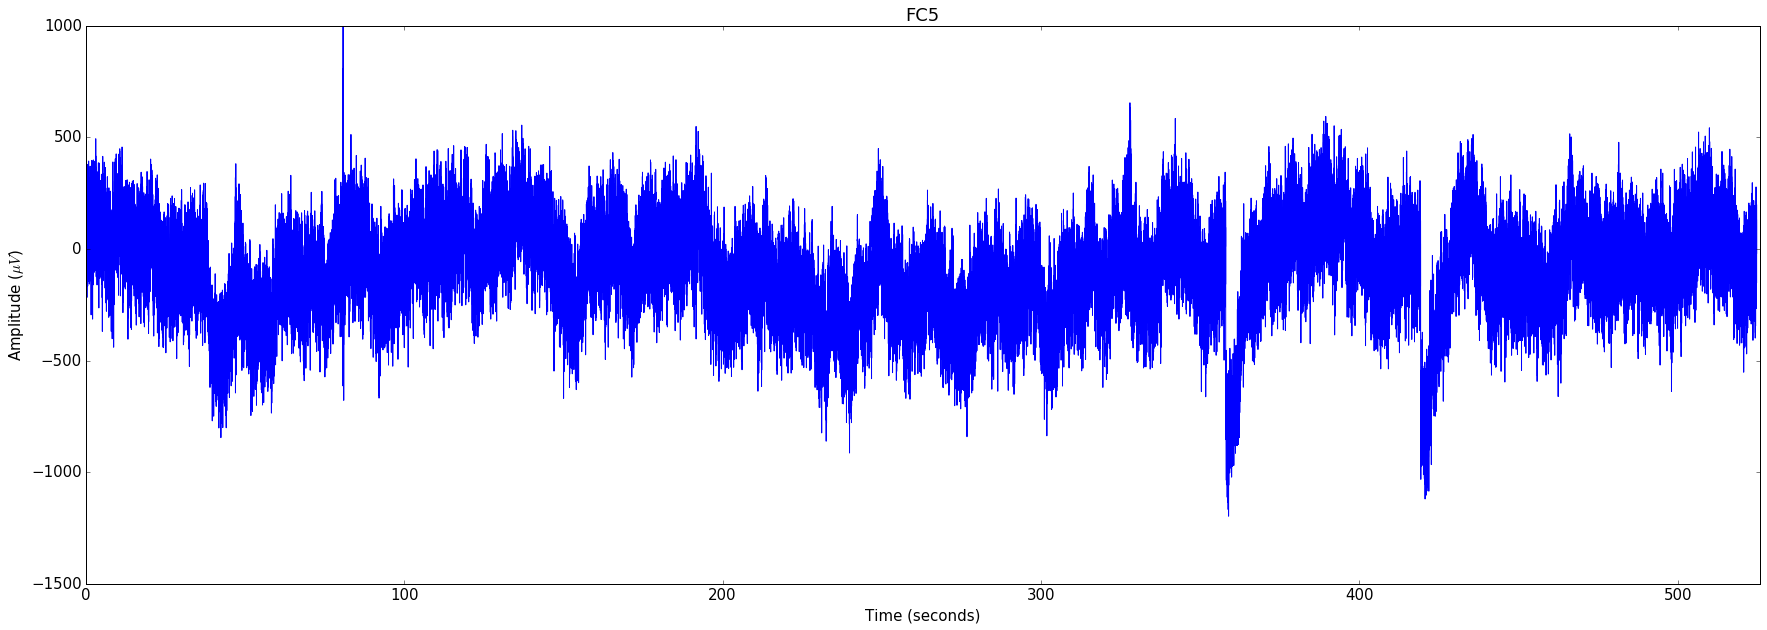

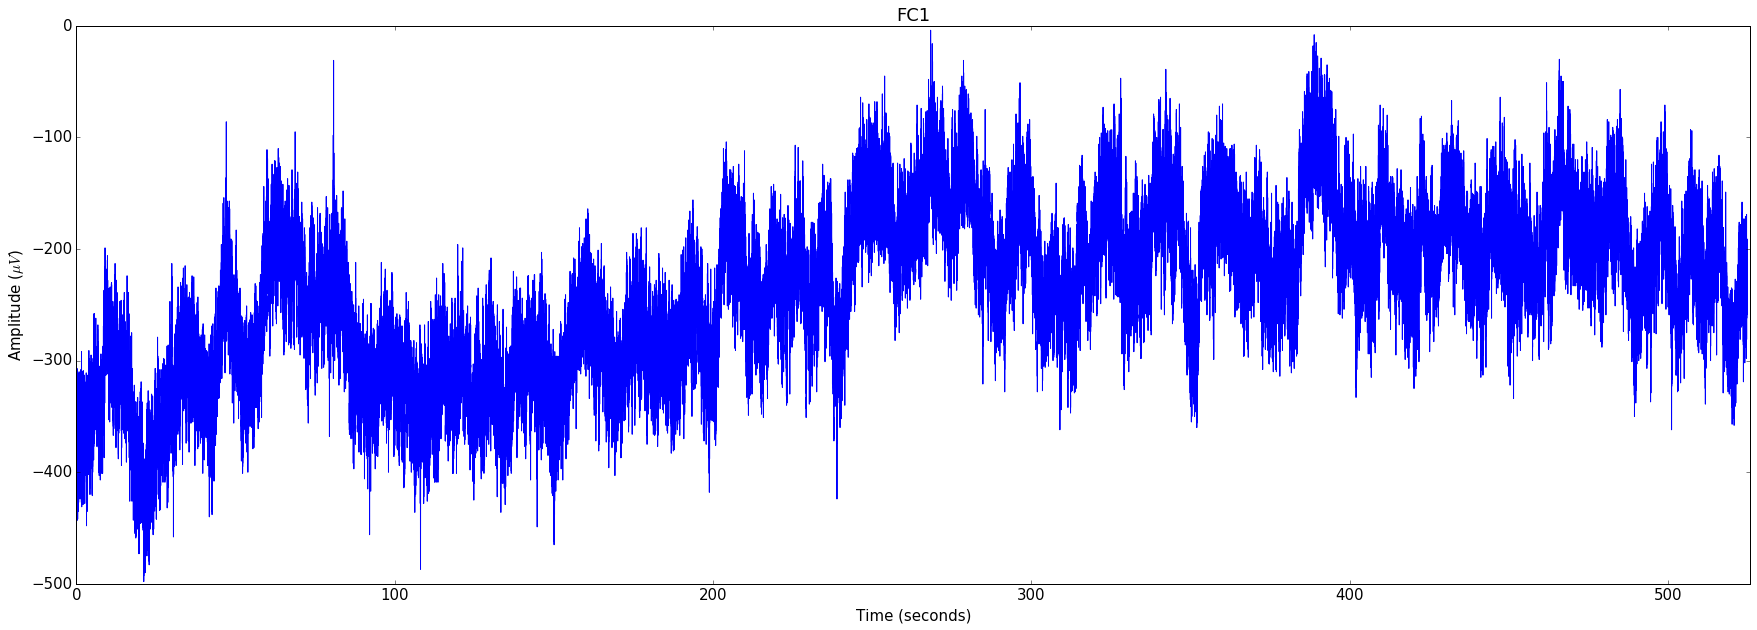

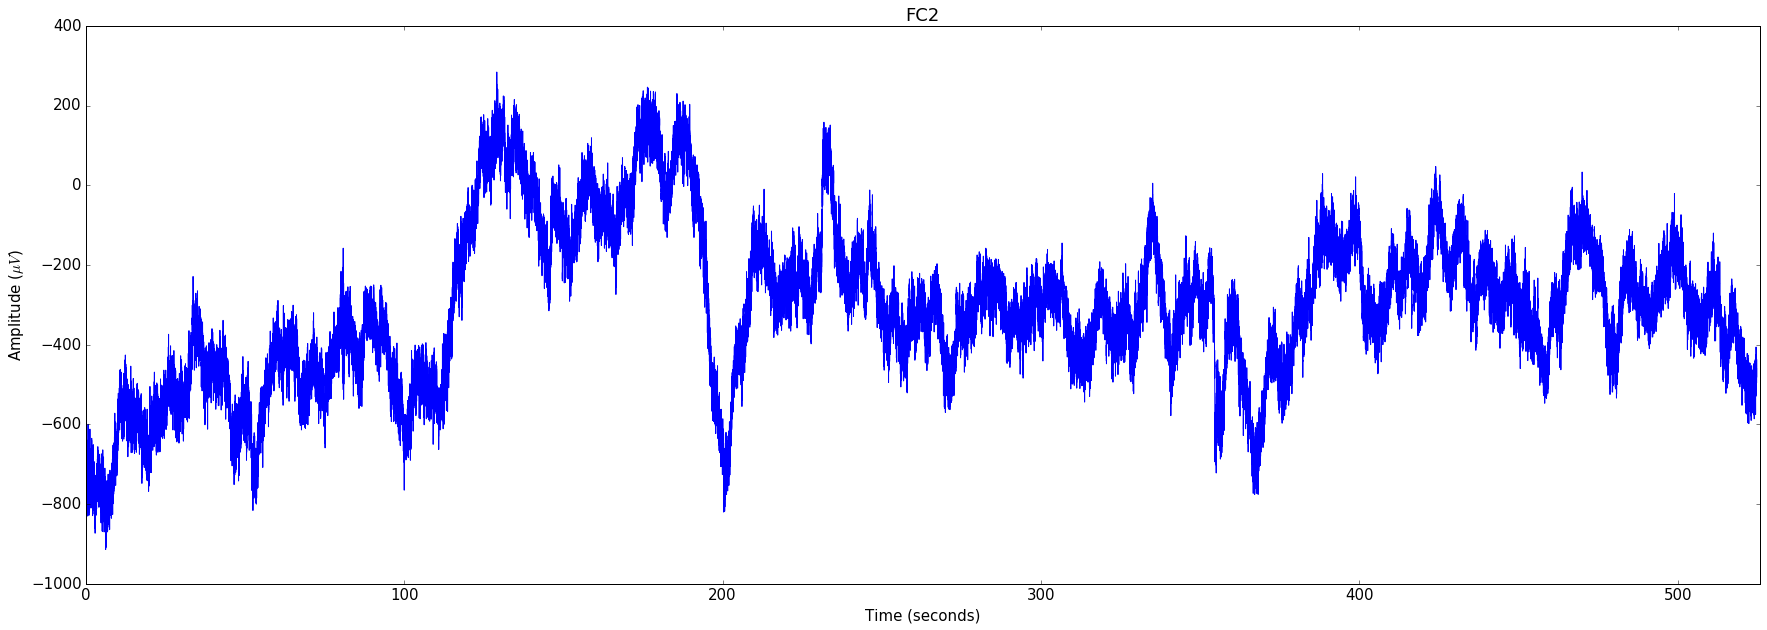

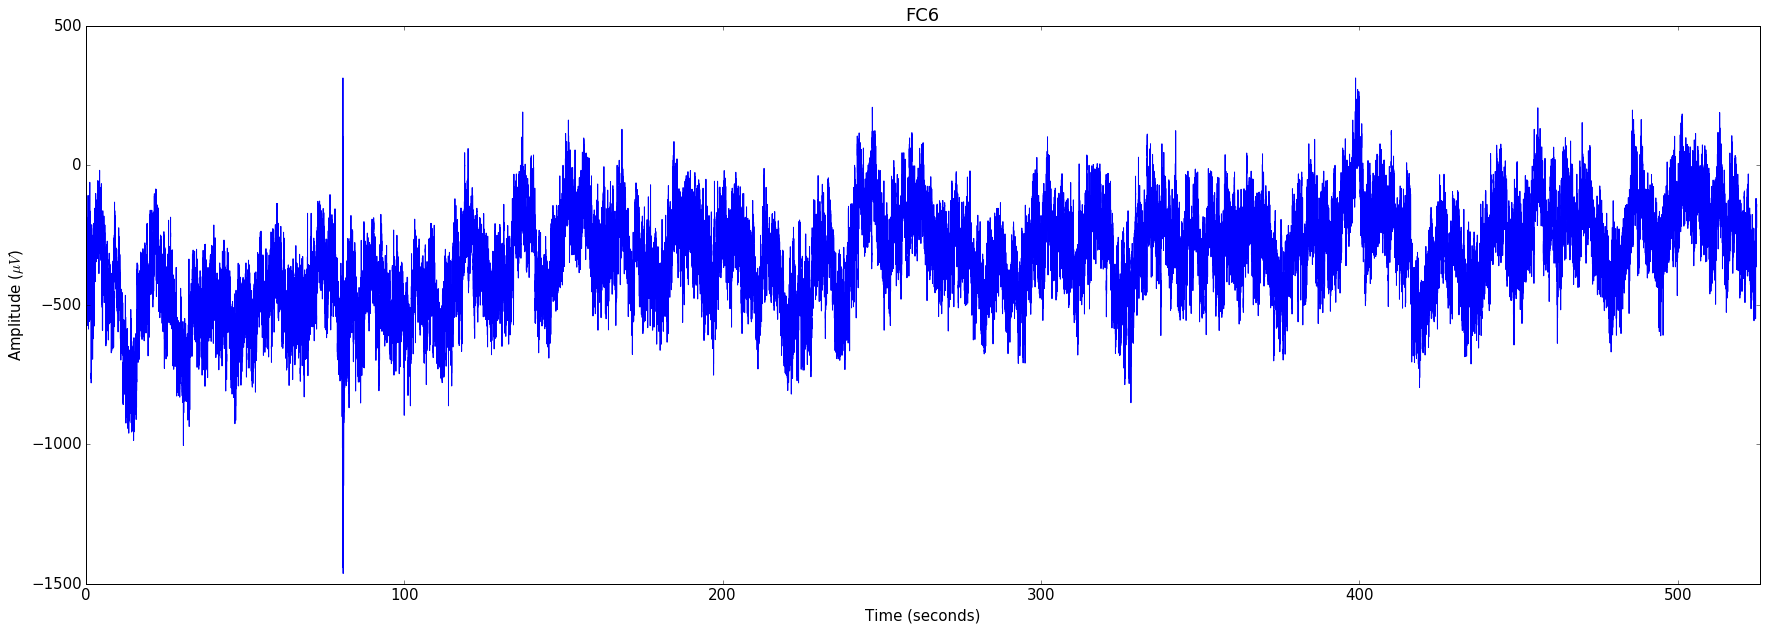

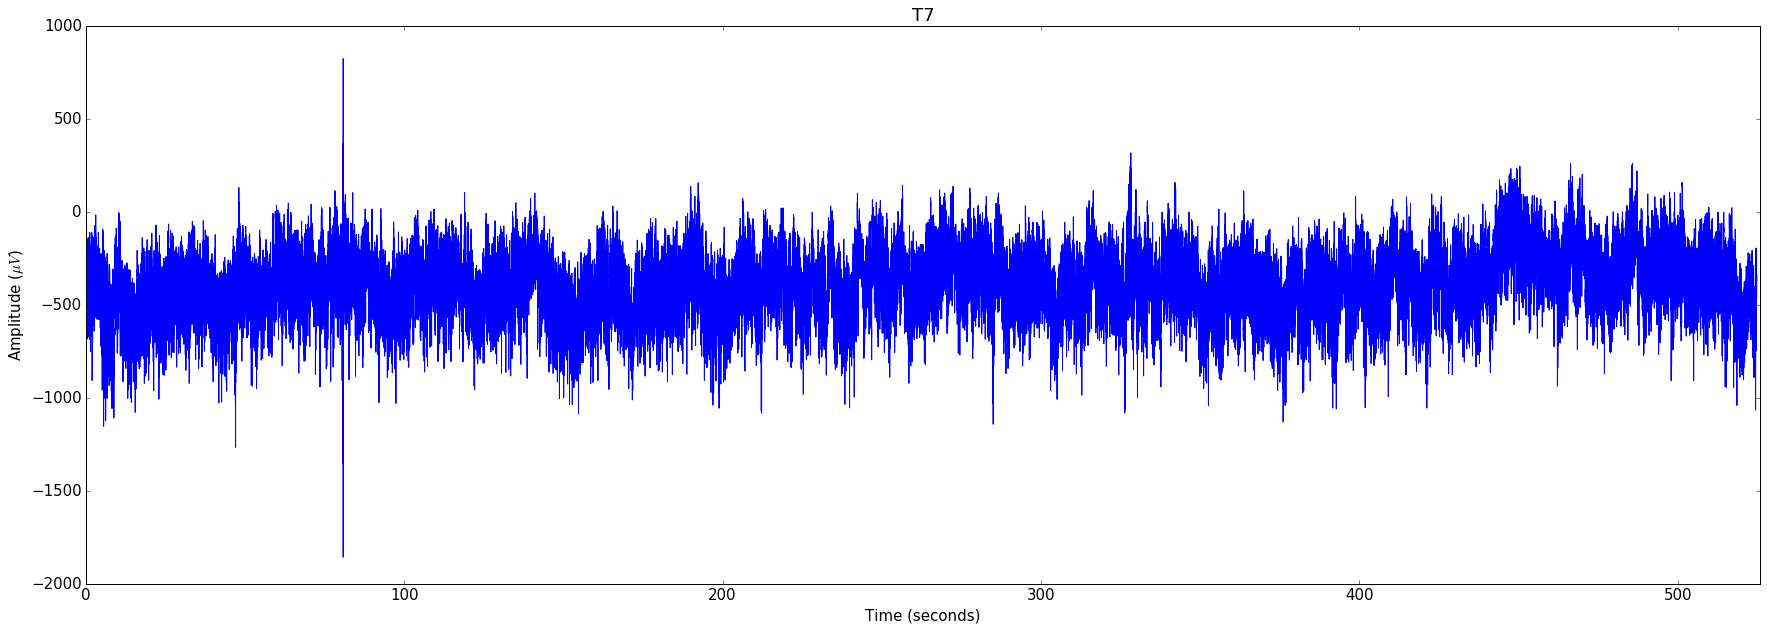

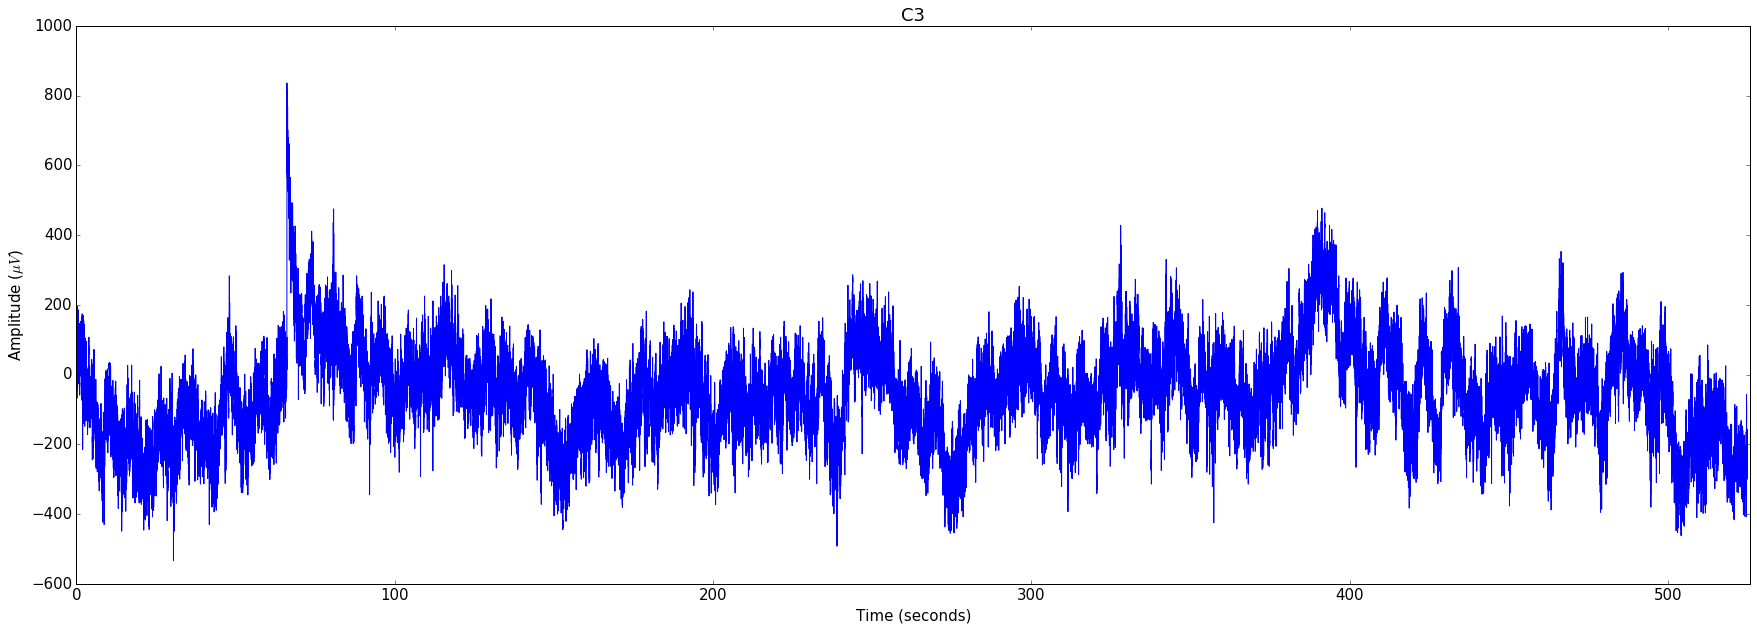

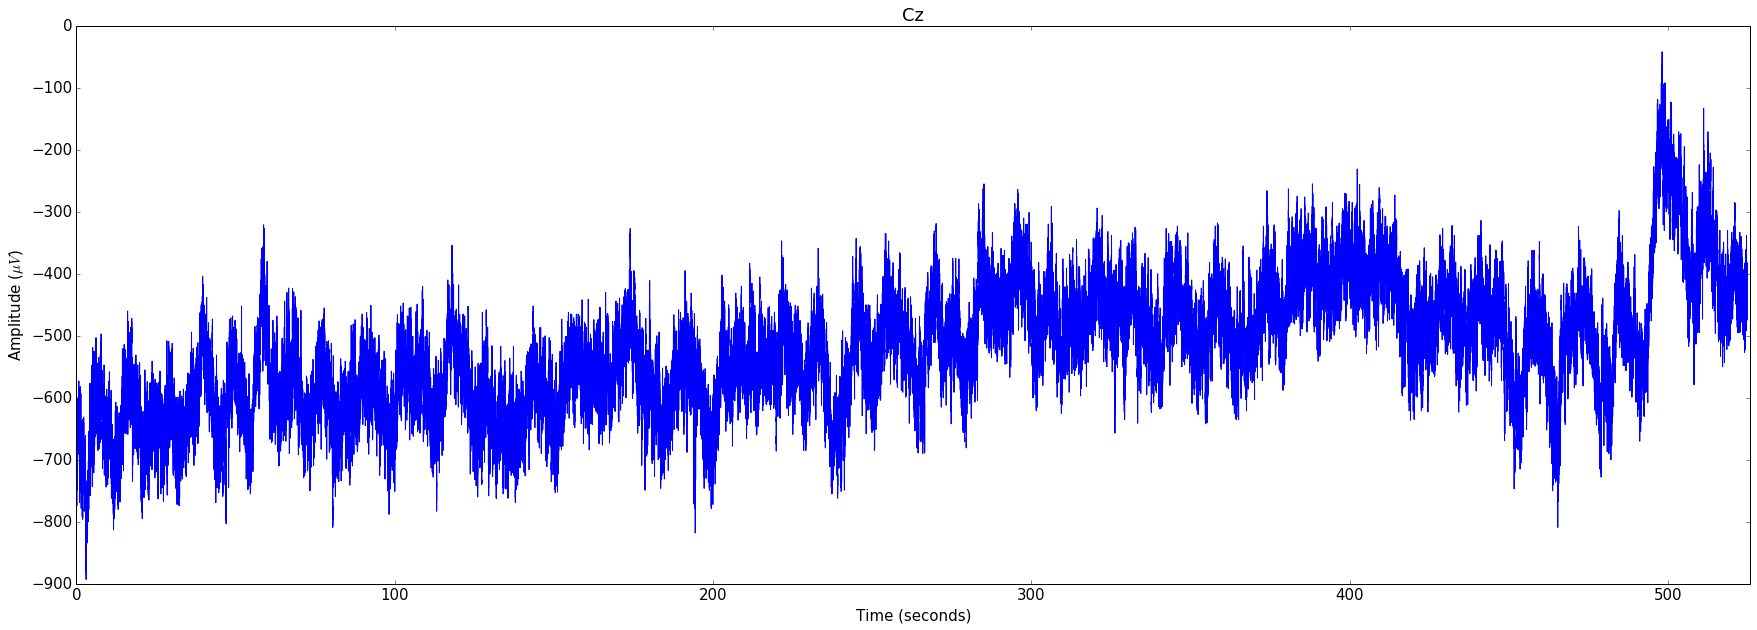

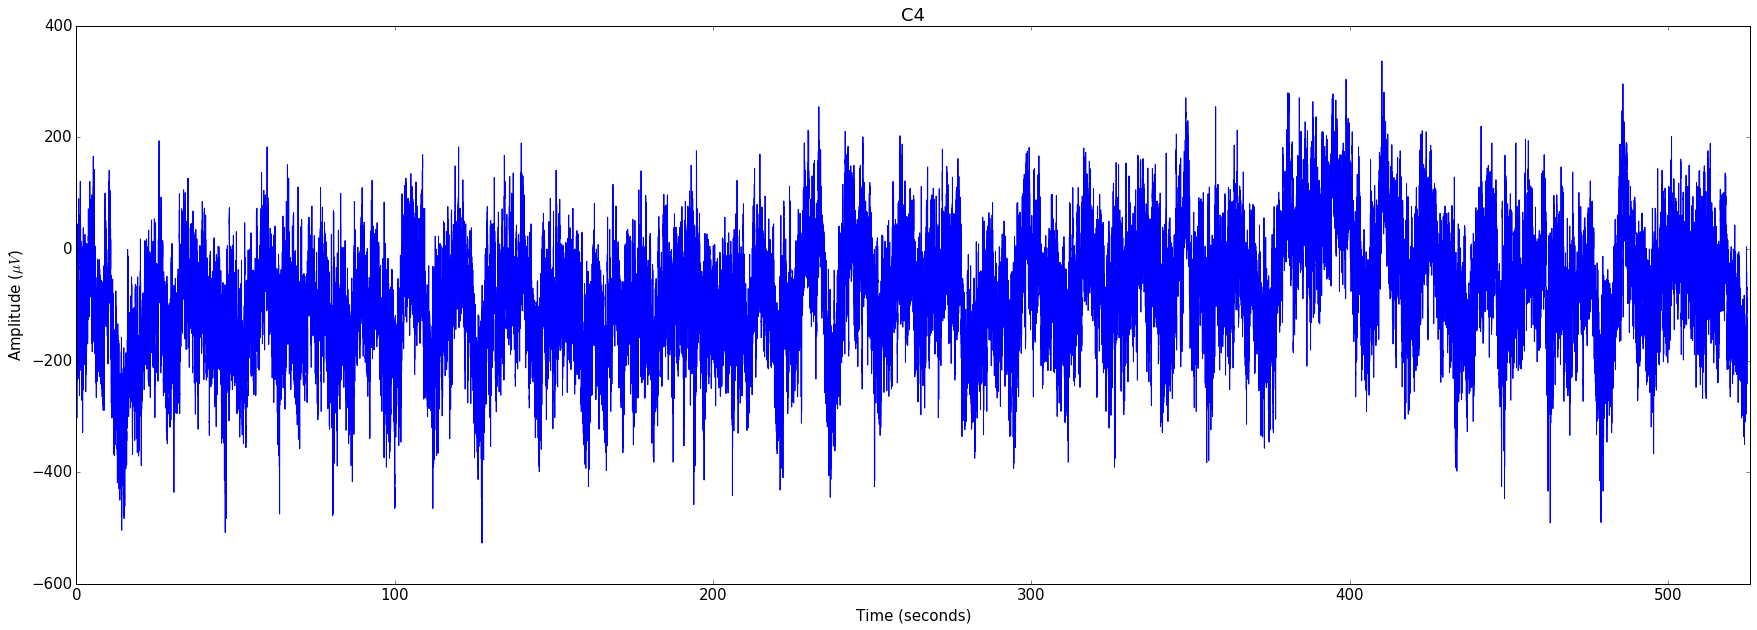

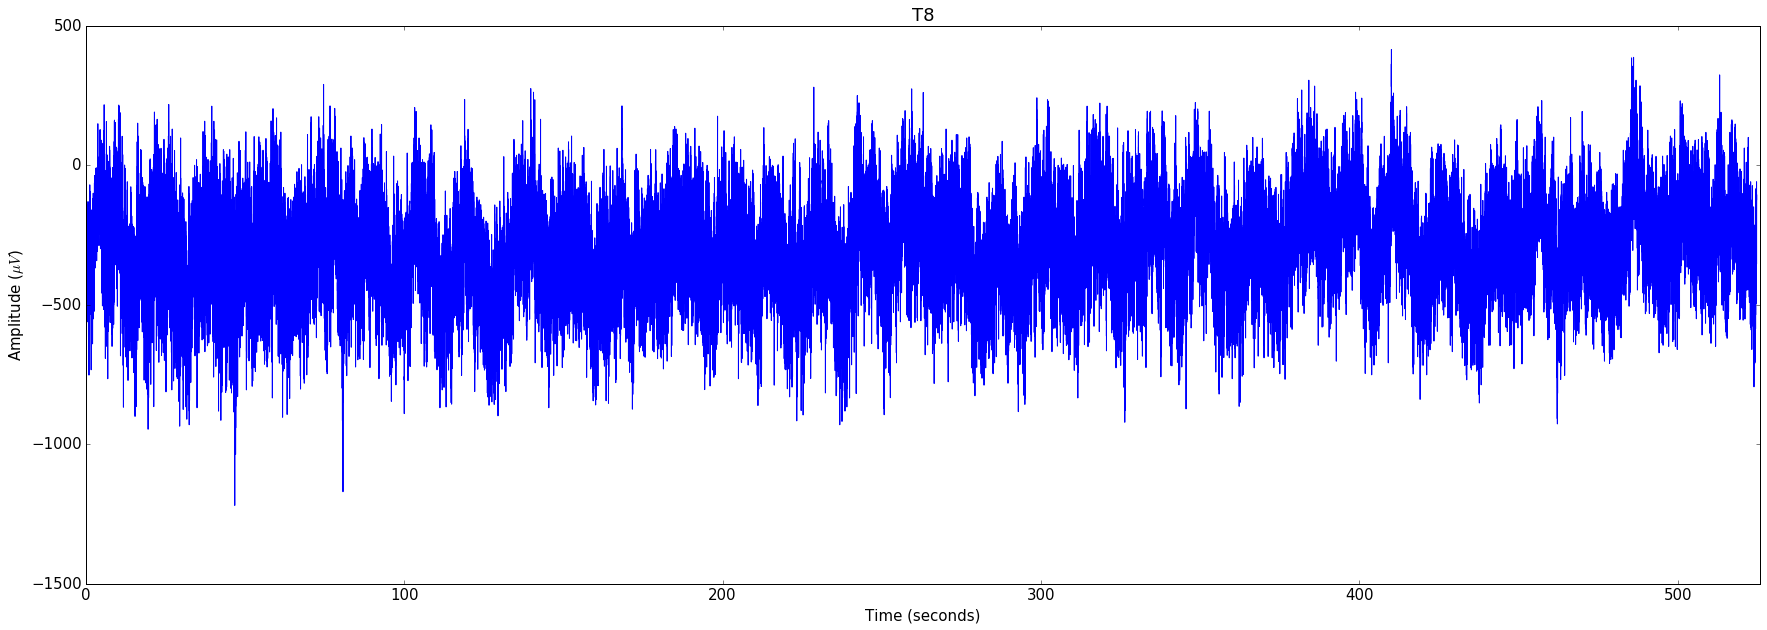

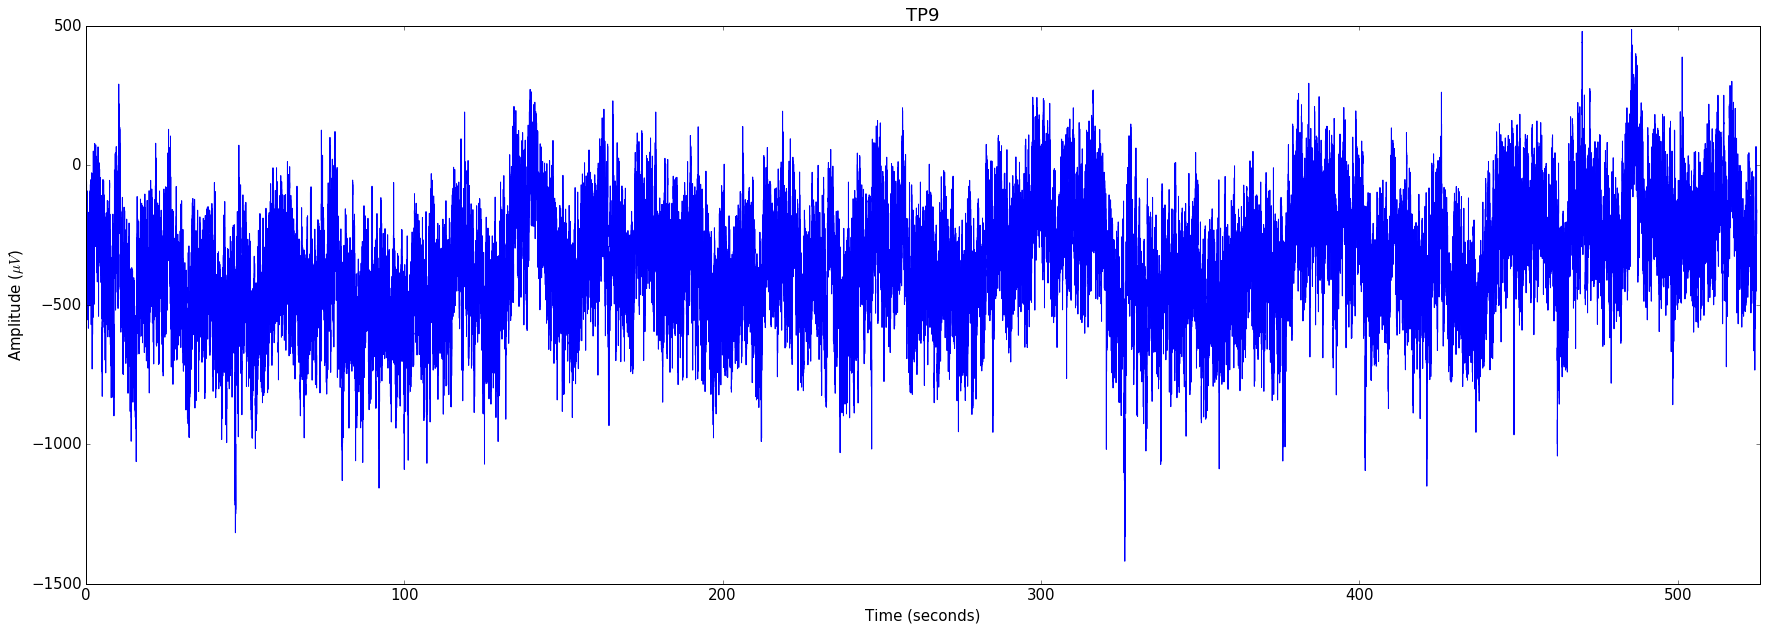

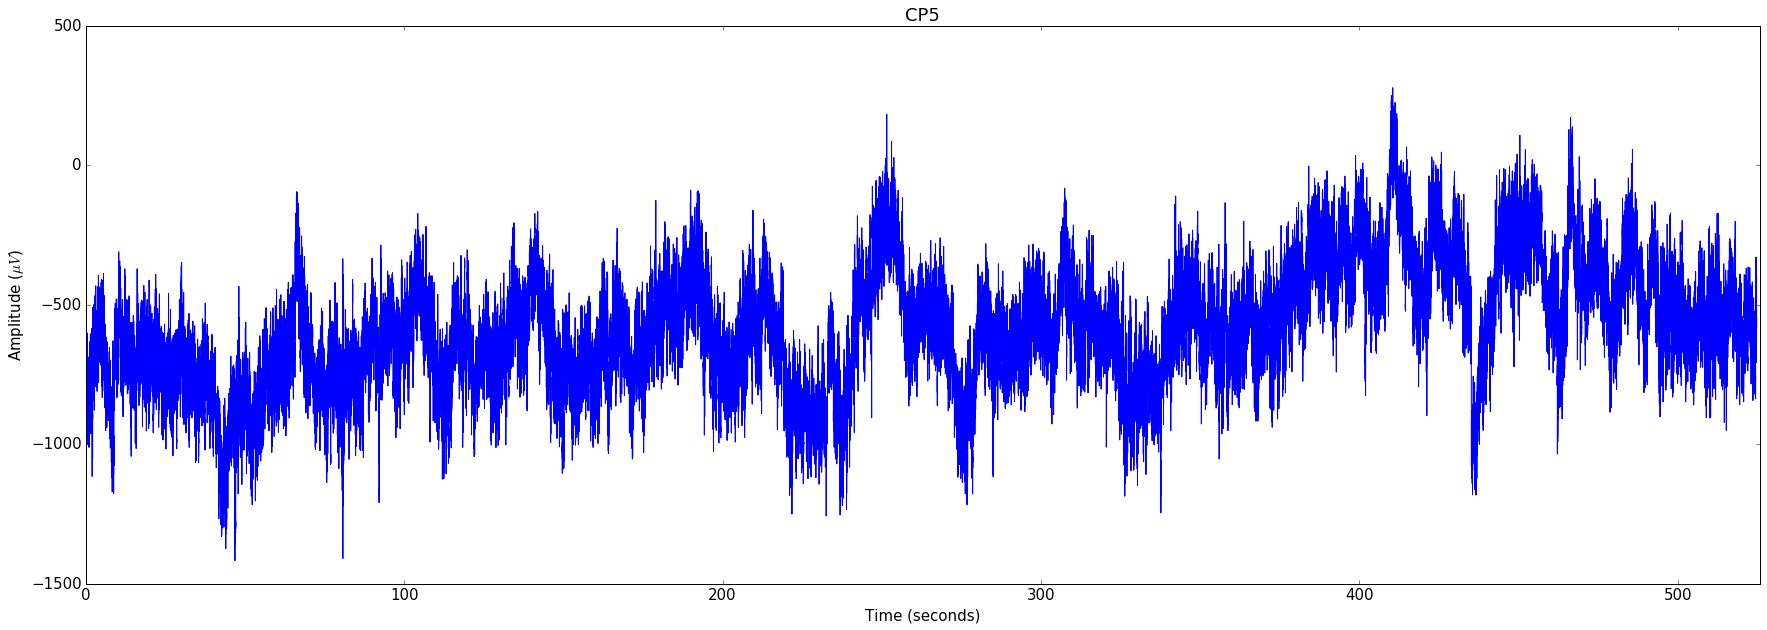

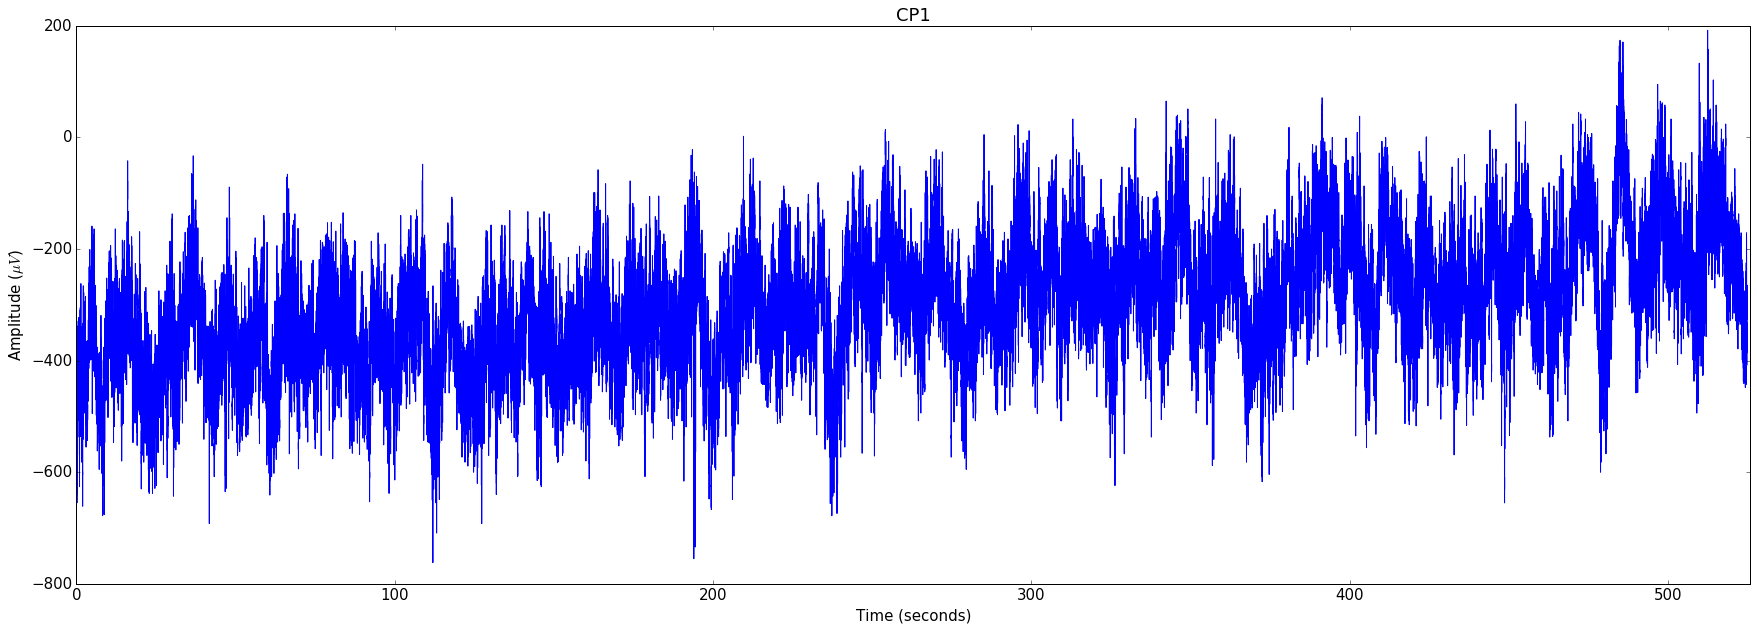

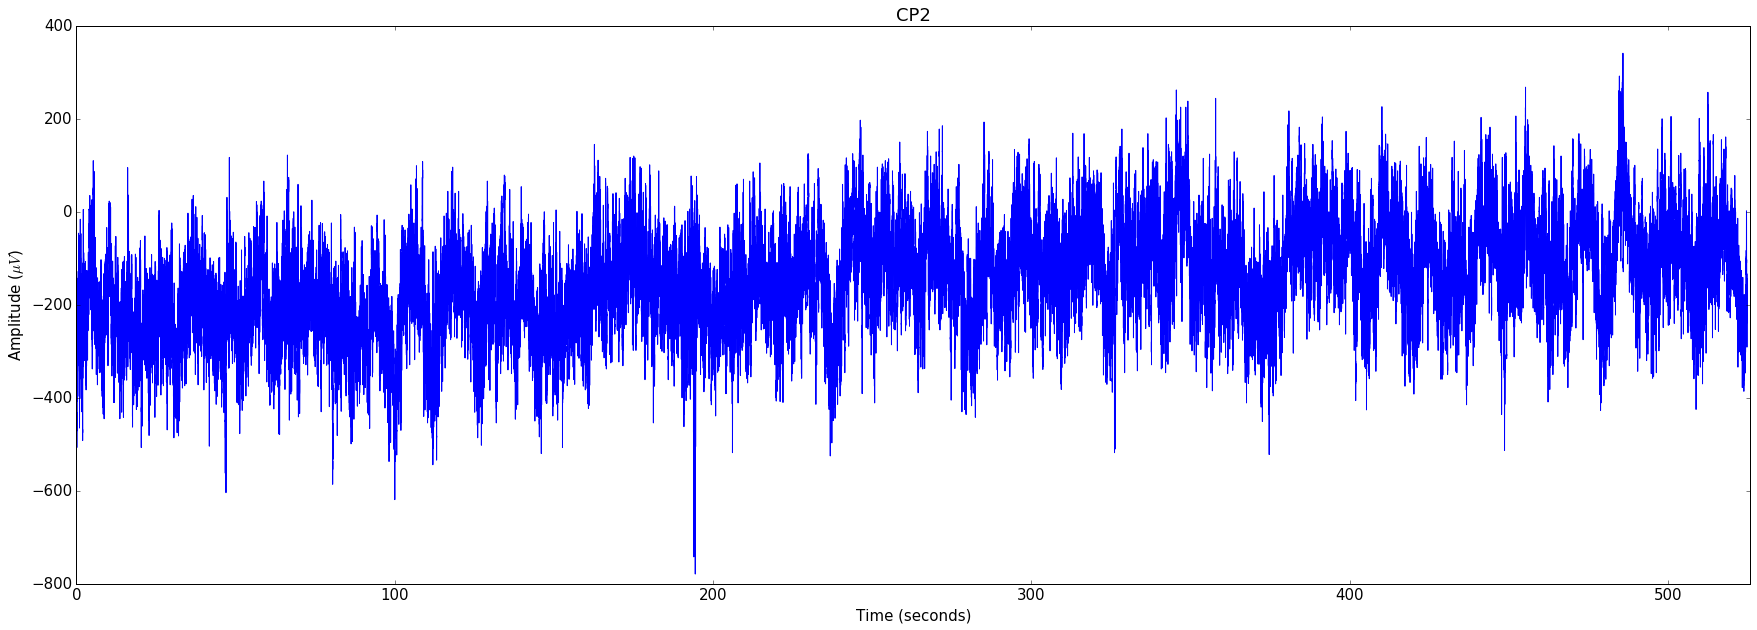

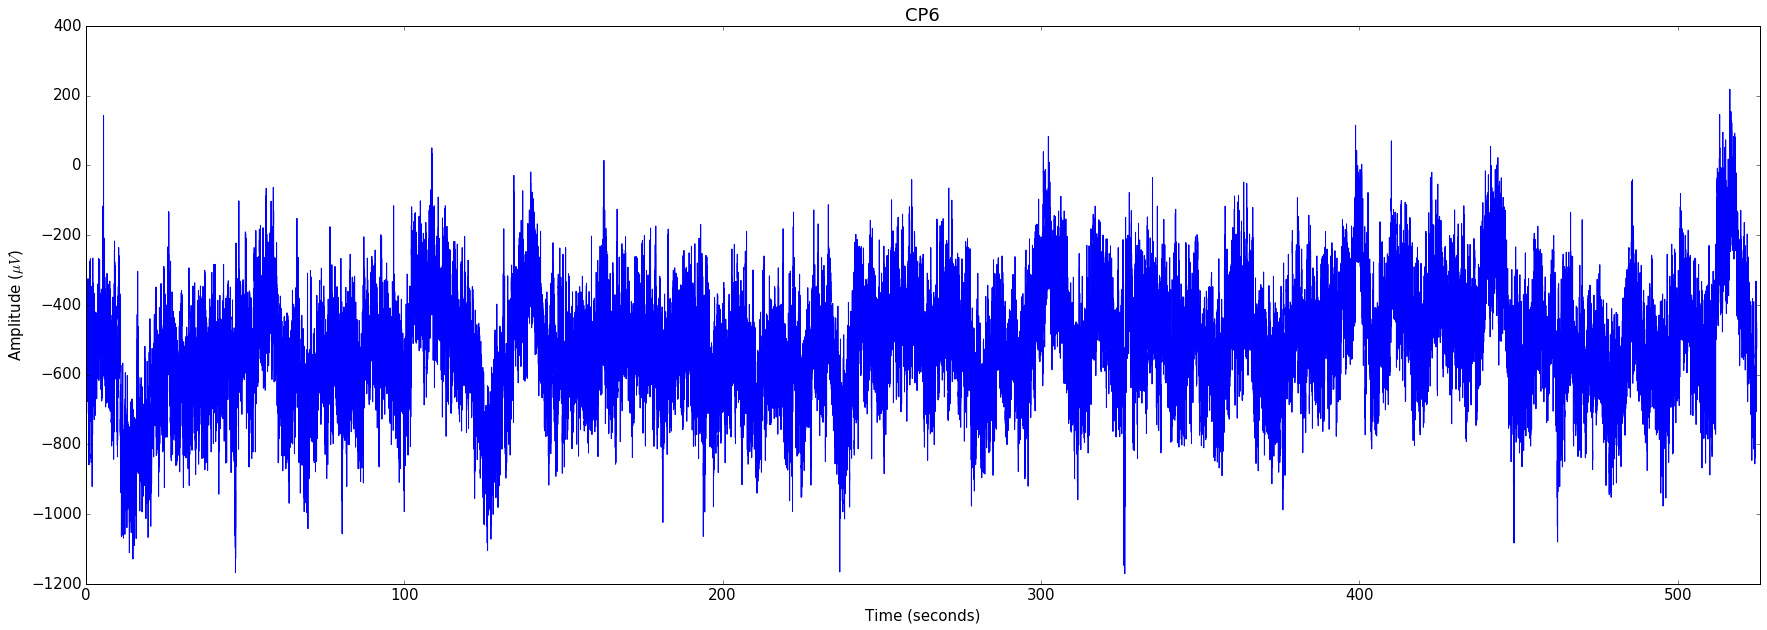

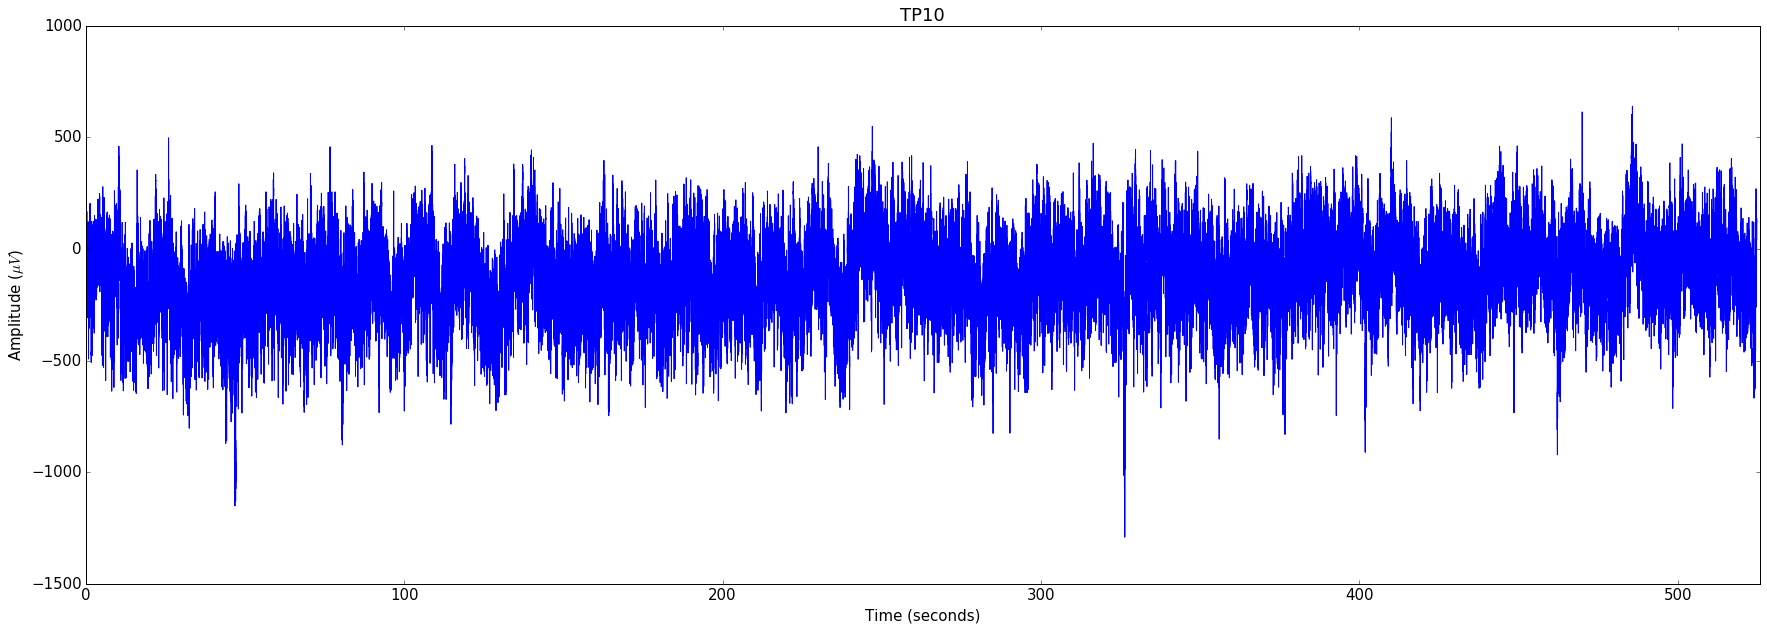

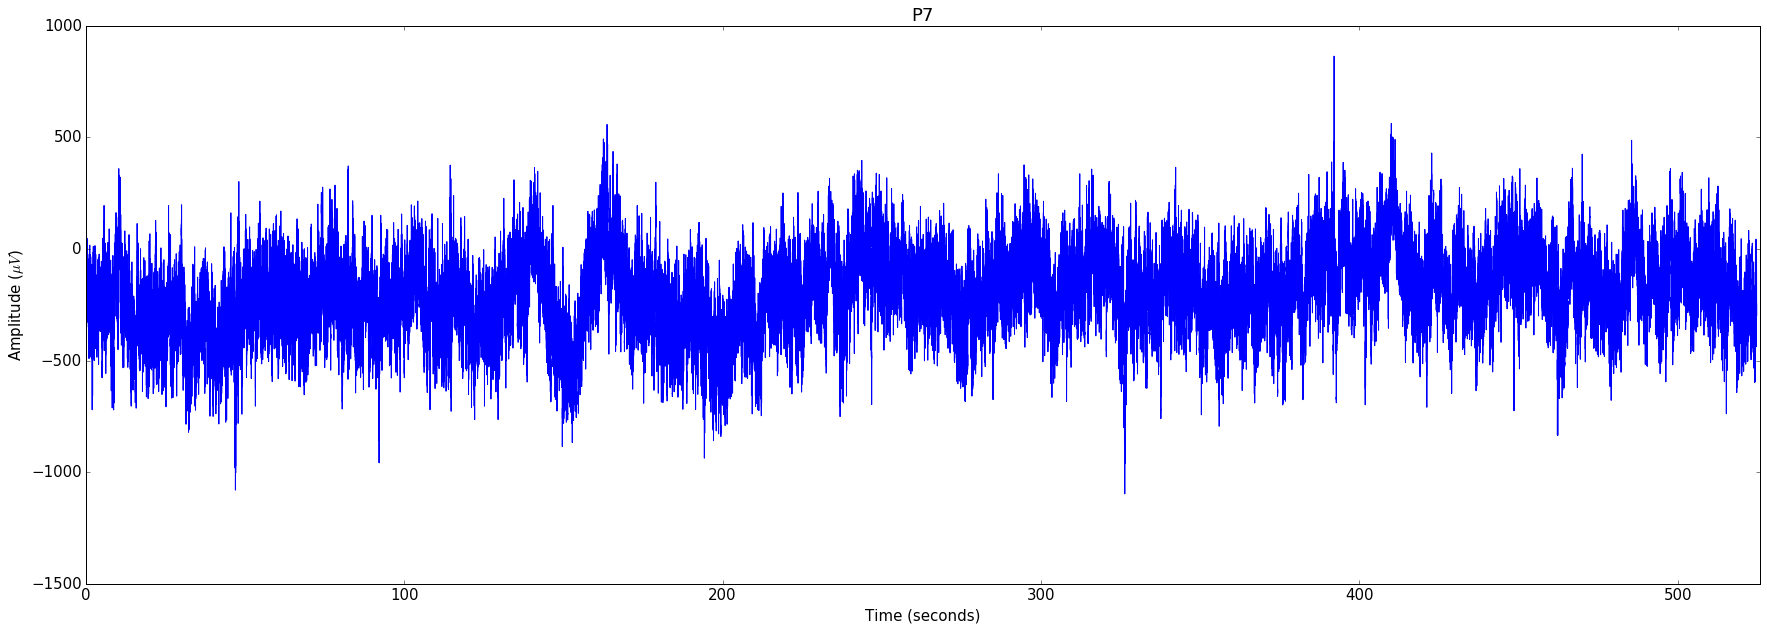

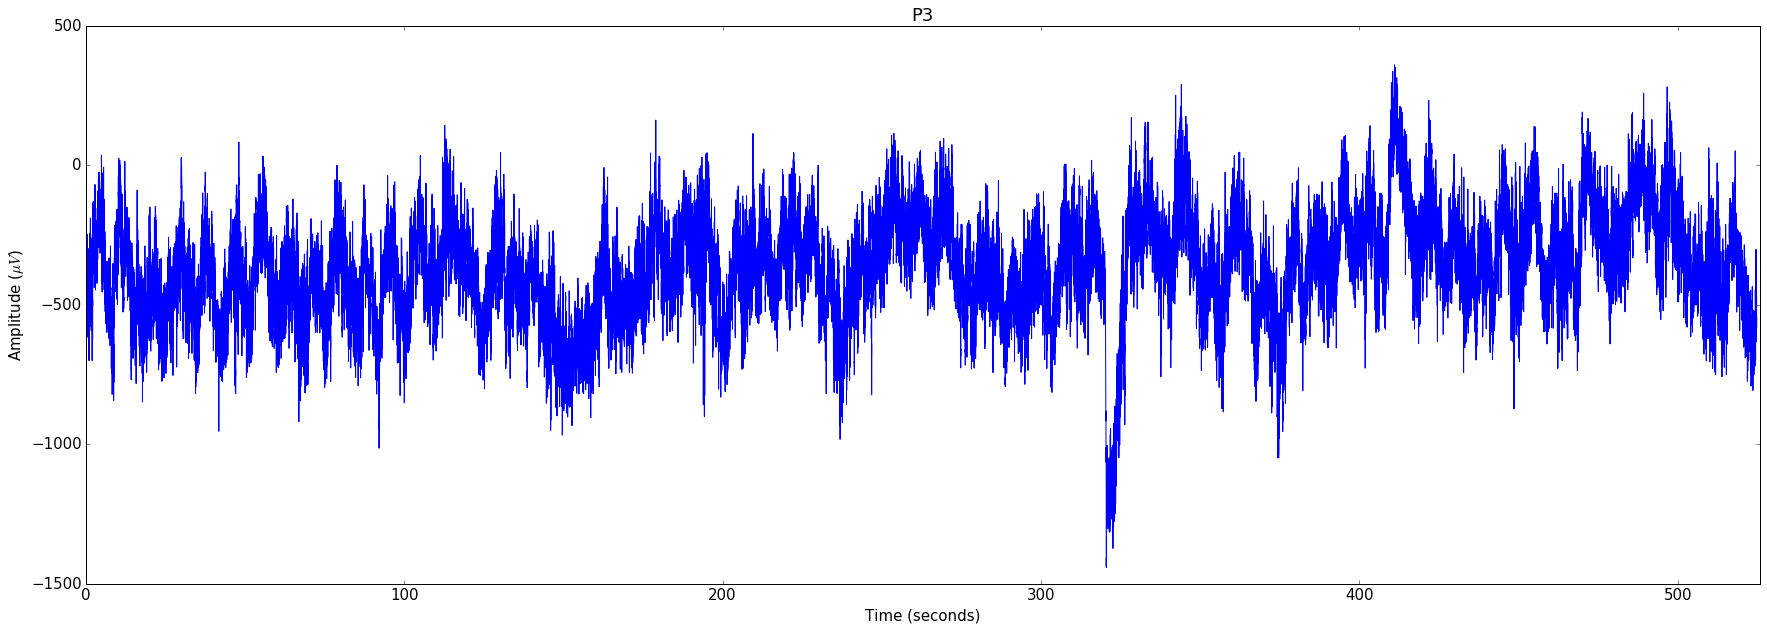

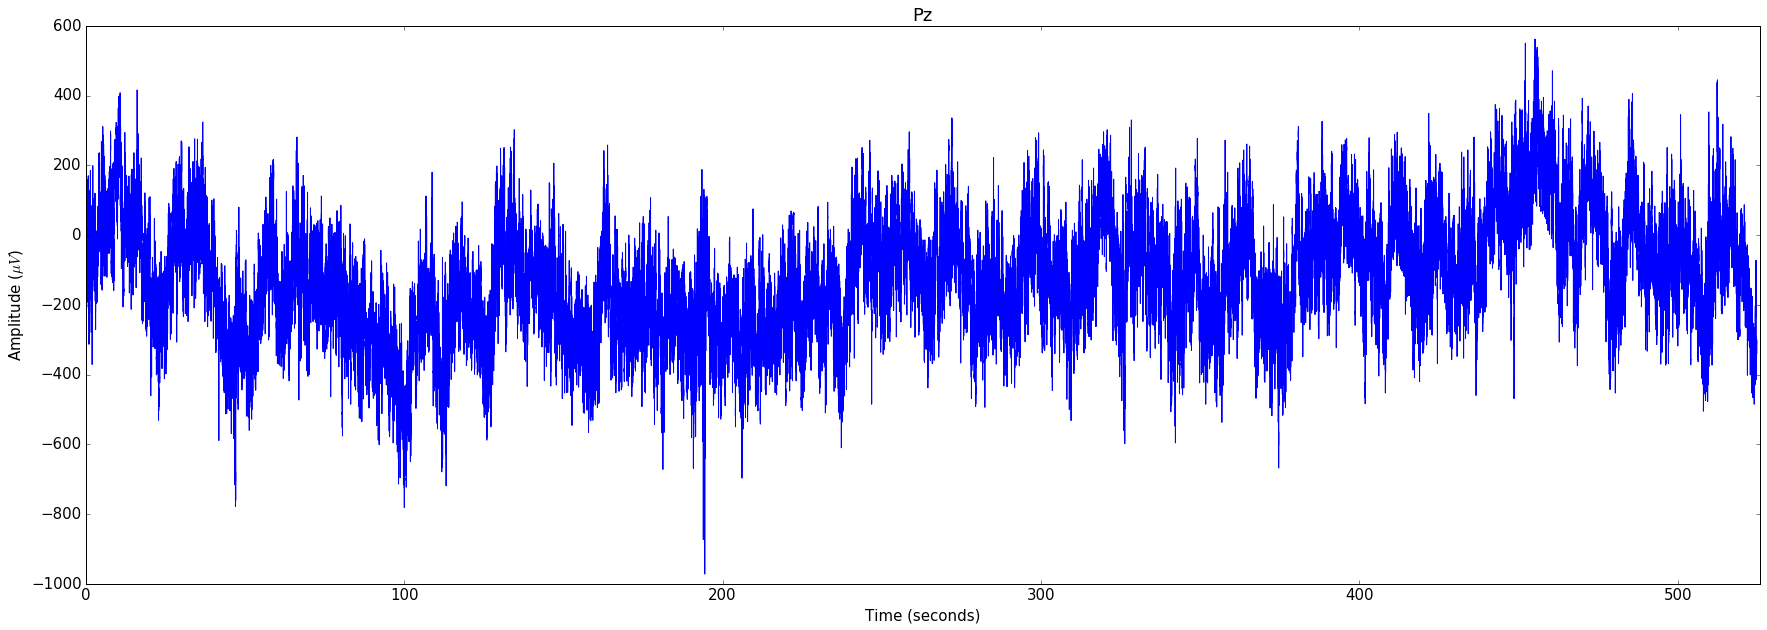

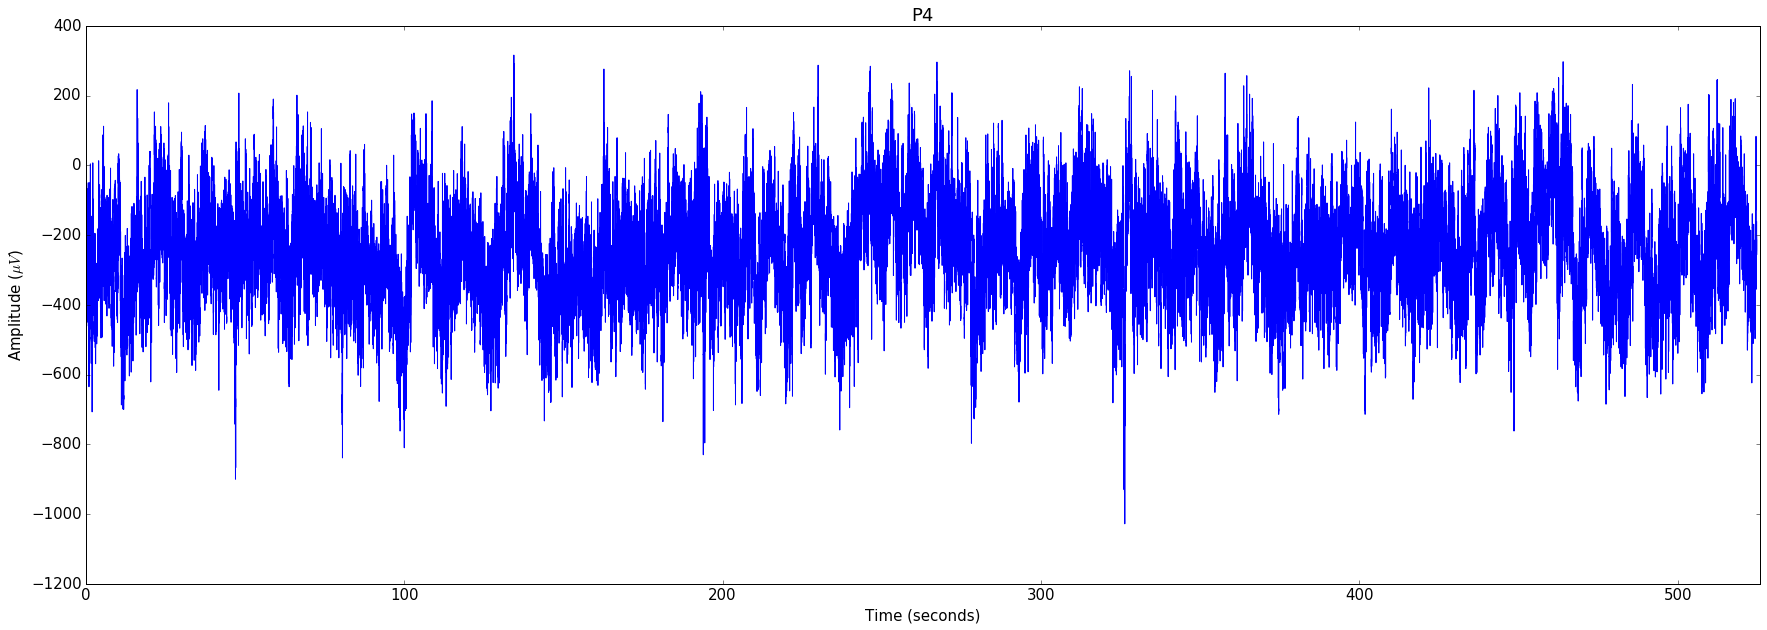

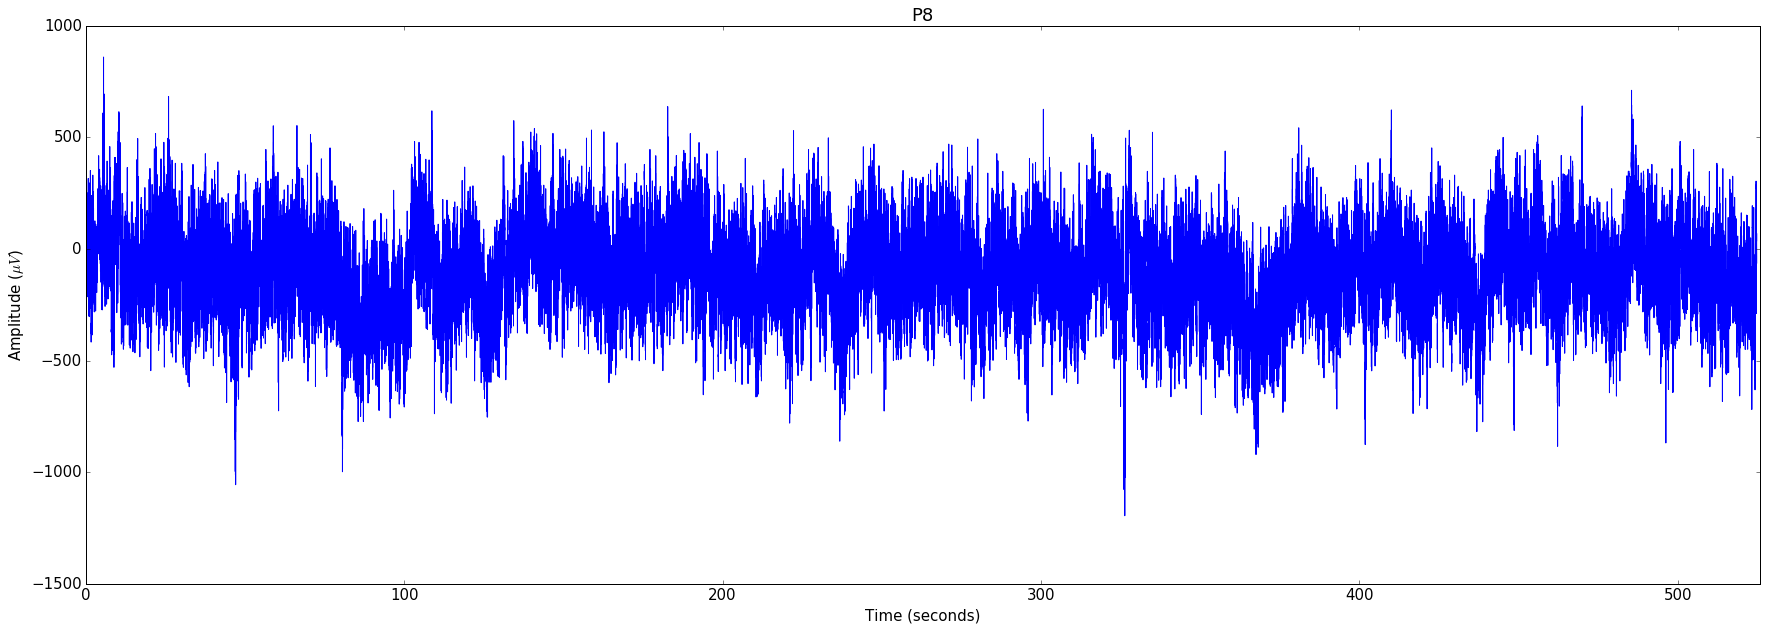

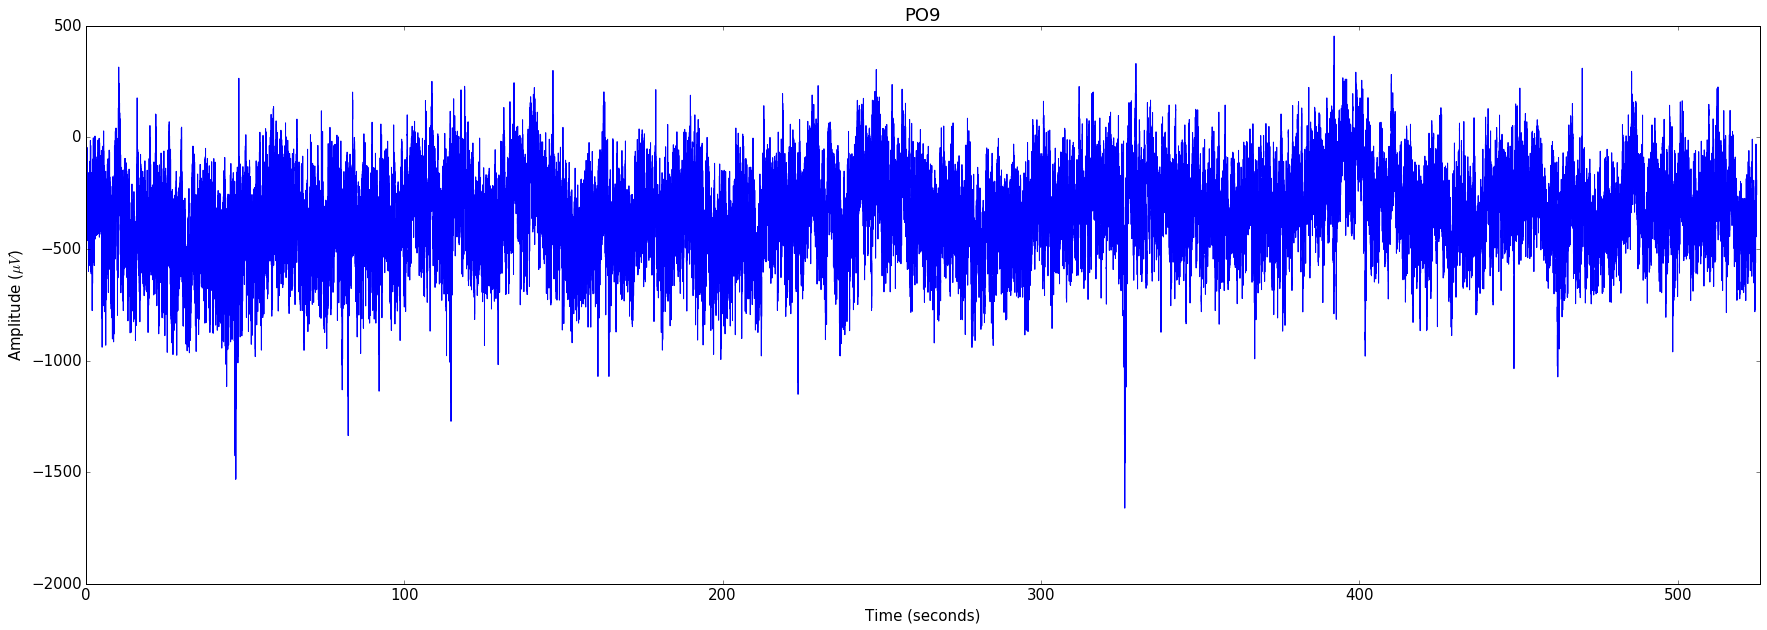

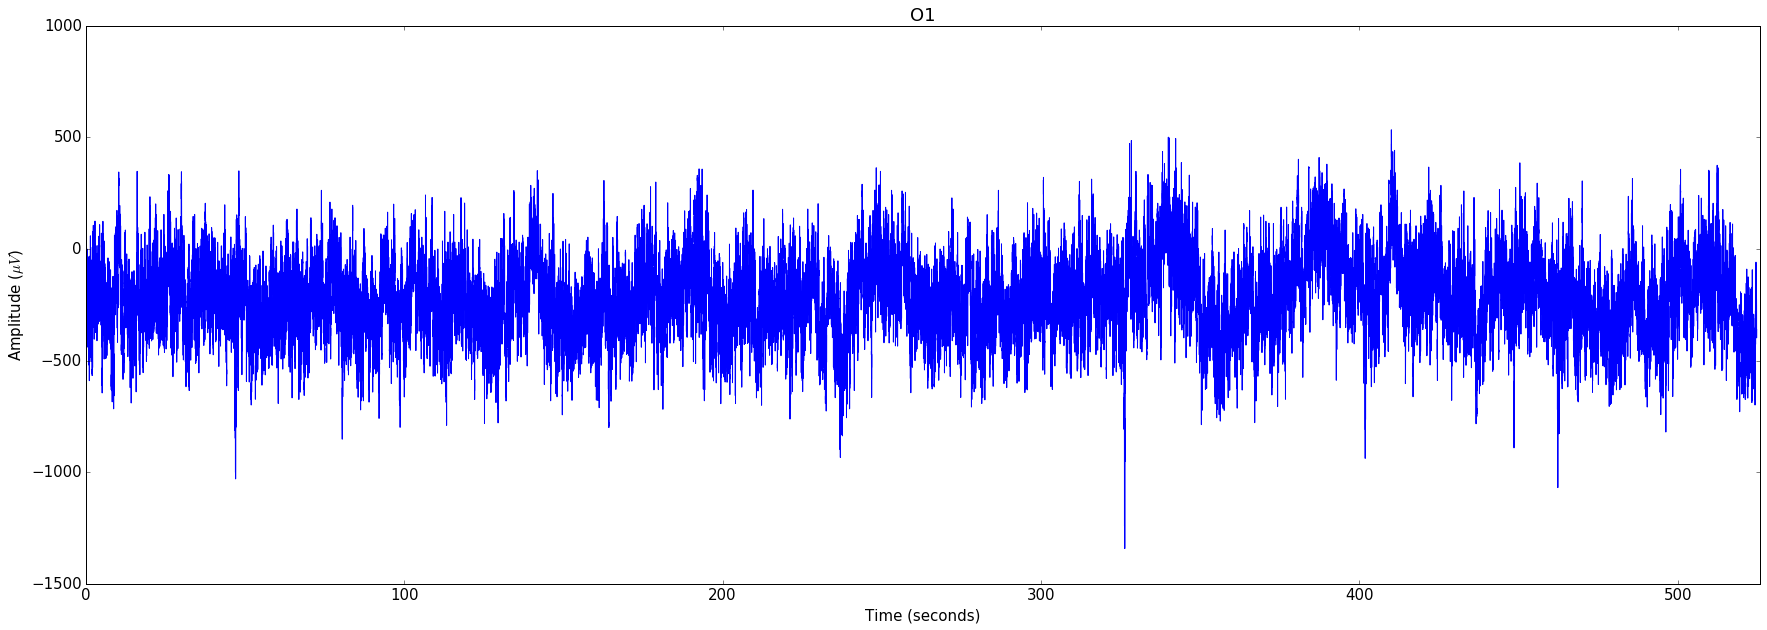

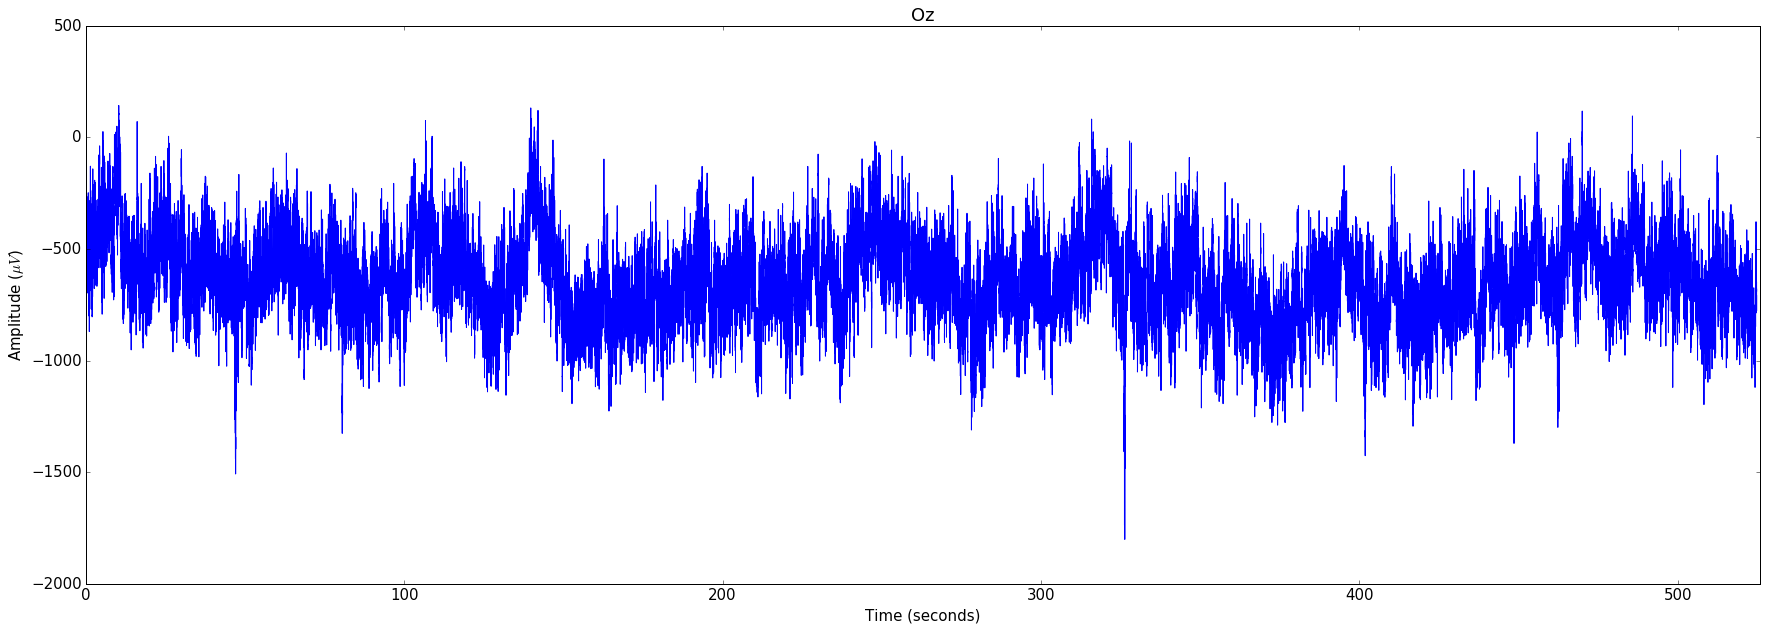

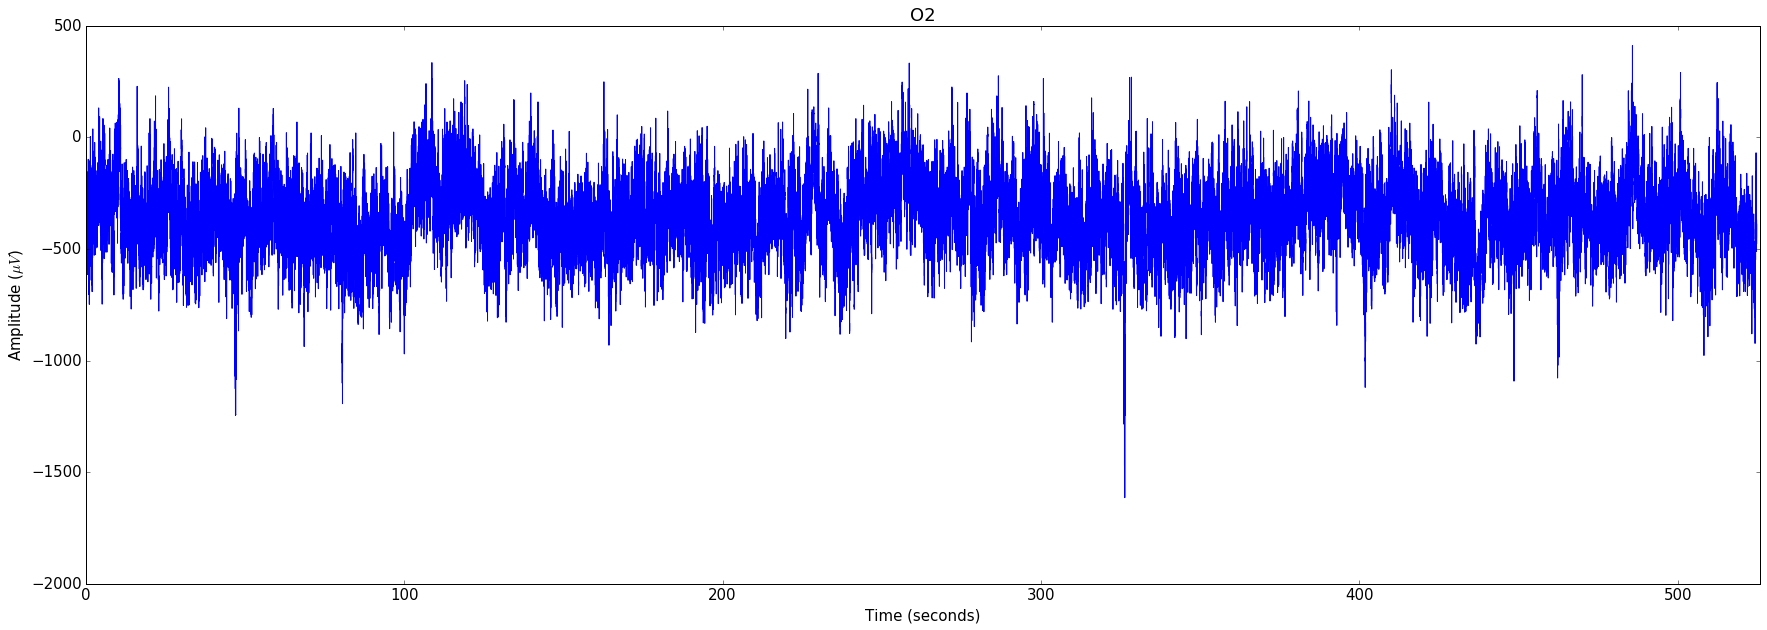

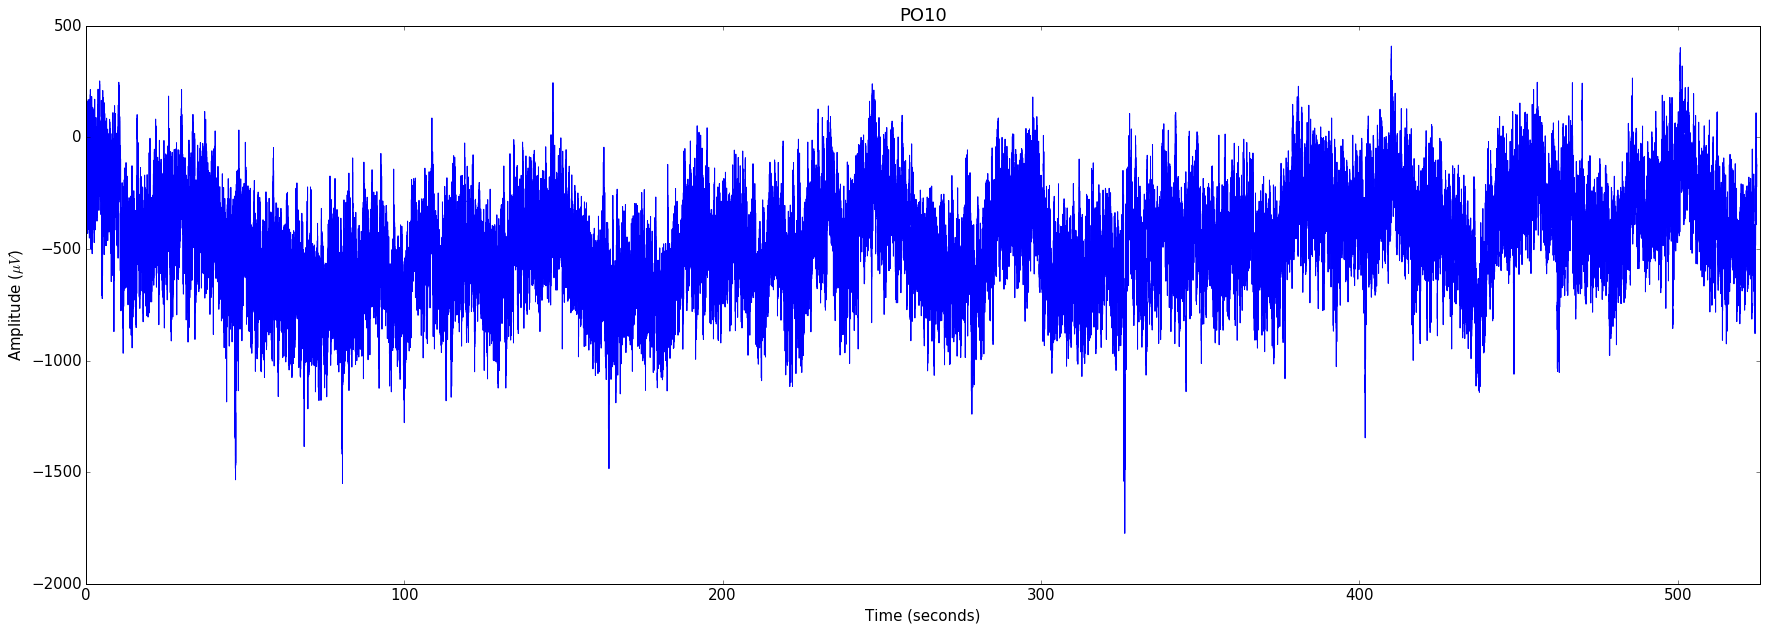

In [9]:
#let's look at the time series of all the plots
for col in series.columns:
    fig = plt.gcf()
    fig.set_size_inches((30, 10))
    #plt.plot(x_axis[:10000], series[col].values[:10000])
    plt.plot(x_axis, series[col].values)
    plt.xlabel('Time (seconds)')
    plt.ylabel(r'Amplitude ($\mu V$)')
    plt.xlim(0, x_axis[-1] + 1)
    #plt.xlim(0)
    plt.title(col)
    plt.show()
    plt.close()


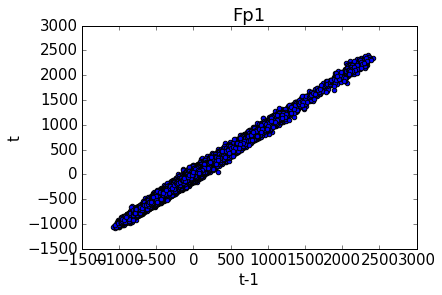

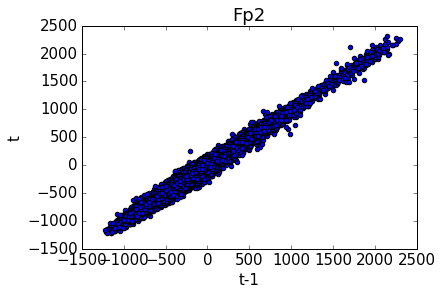

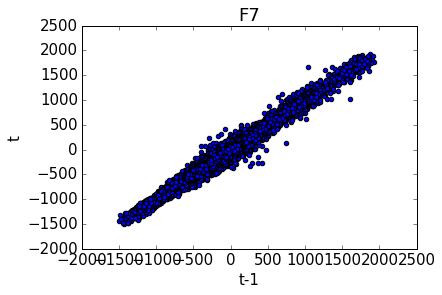

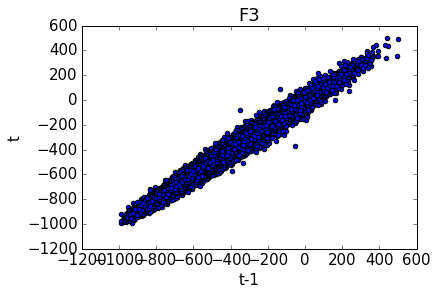

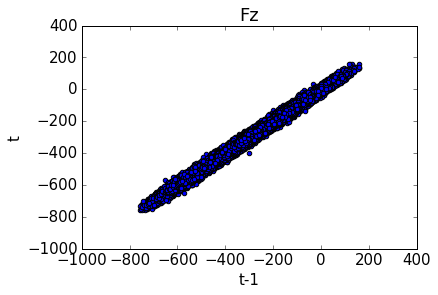

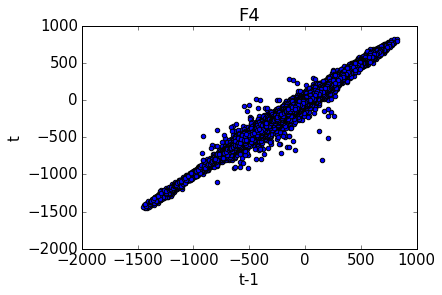

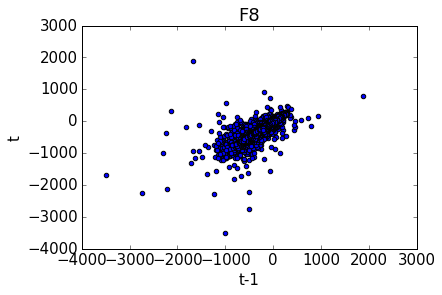

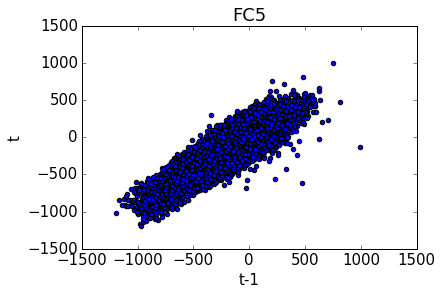

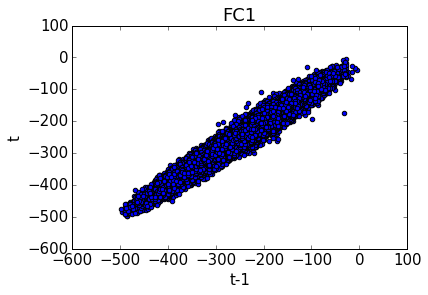

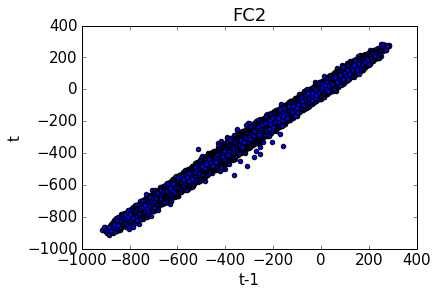

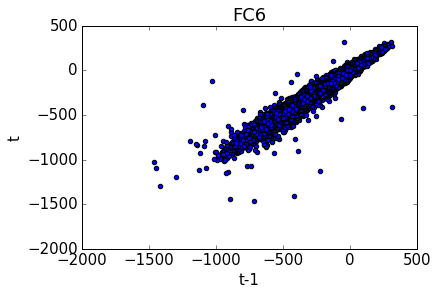

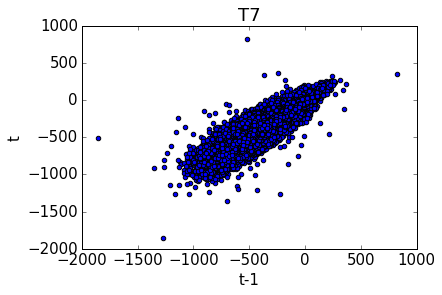

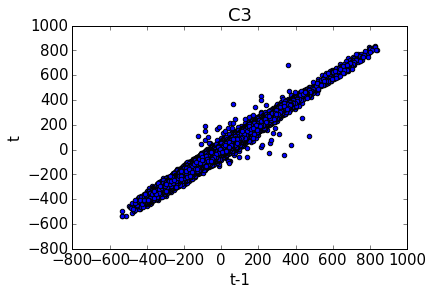

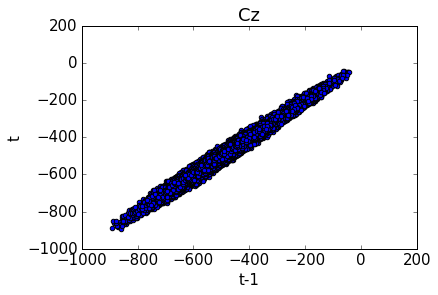

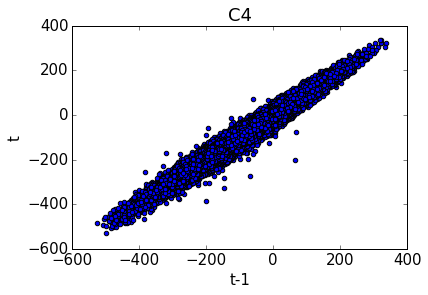

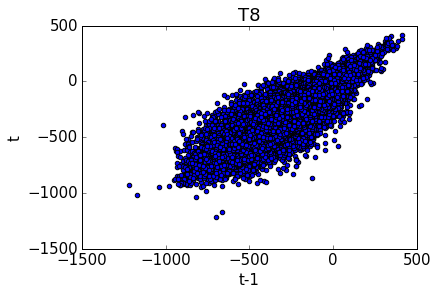

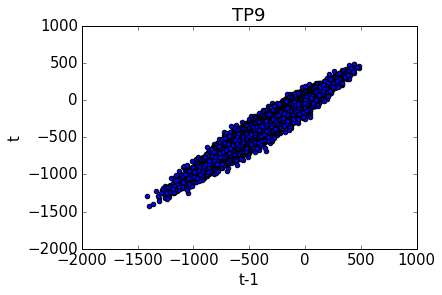

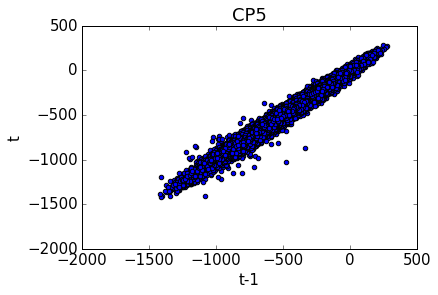

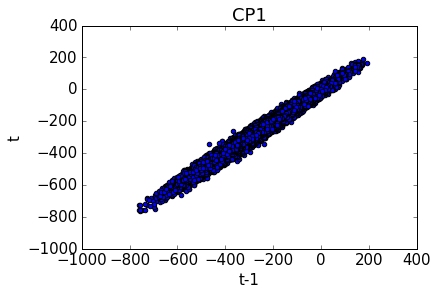

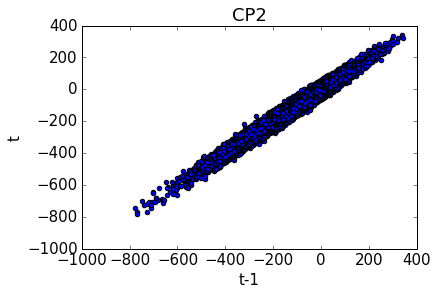

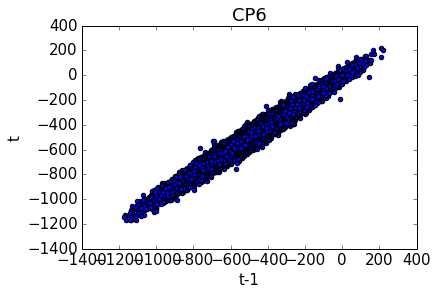

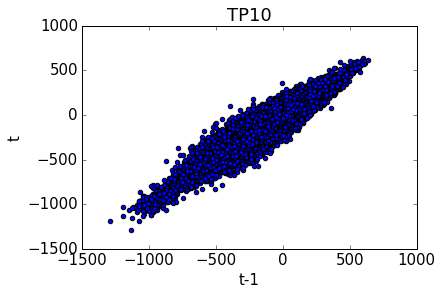

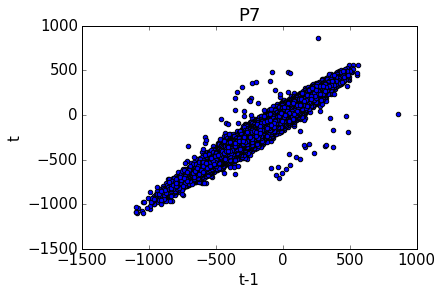

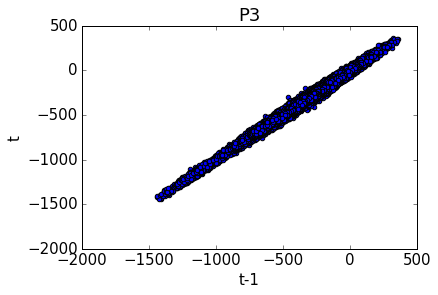

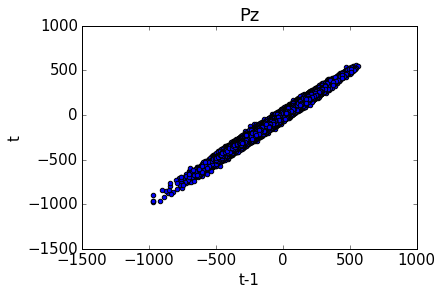

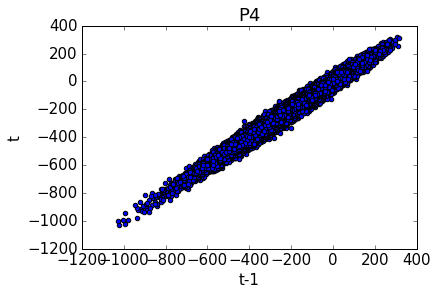

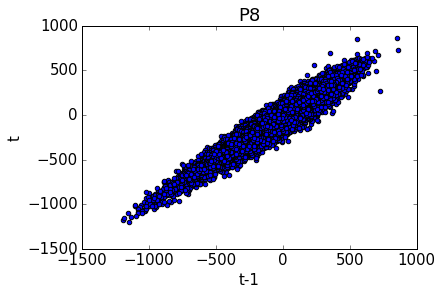

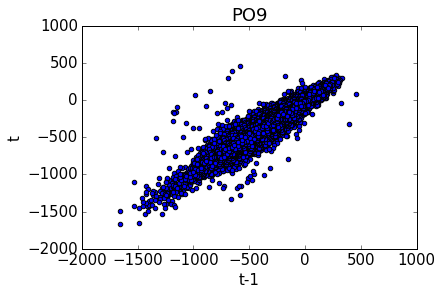

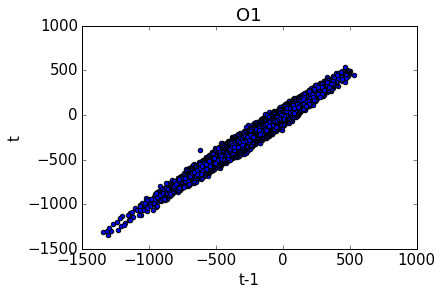

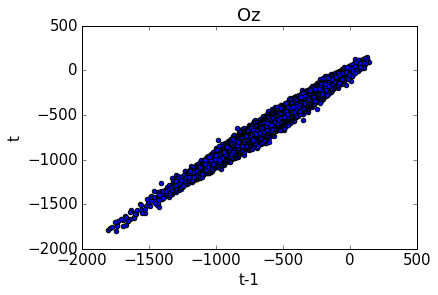

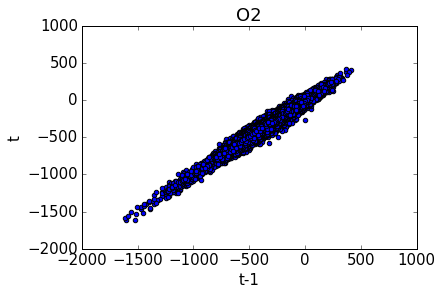

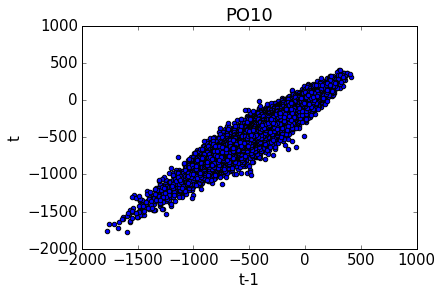

In [10]:
# autocorrelation plots
for col in series.columns:
    col_values = series[col].values
    plt.scatter(col_values[:-1], col_values[1:])
    plt.xlabel('t-1')
    plt.ylabel(r't')
    plt.title(col)
    plt.show()
    plt.close()

In [11]:
for i in range(series.shape[1]):
    print (np.corrcoef(series.values[1:, i], series.values[:-1, i])[0, 1])

0.990697162473
0.982719581828
0.982435994221
0.985306871392
0.99497028762
0.995559386958
0.966082942133
0.923088573538
0.978805476104
0.99652529247
0.987026960461
0.93440488095
0.989363378755
0.98920210645
0.983090845088
0.919621397236
0.972197963491
0.989711896561
0.988172206725
0.987070766945
0.984827800737
0.938591775033
0.975762050261
0.993208634037
0.99305053663
0.986932584659
0.961421464468
0.957415121154
0.986313361622
0.986213760579
0.978274455729
0.954970578355


In [12]:
covariance = np.cov(series.values.T)
corr = np.corrcoef(series.values.T)


for i in list(corr):
    print(i)

[ 1.          0.5189143   0.486013    0.47959099  0.30429751  0.24827159
  0.24486944  0.18361052  0.34457943  0.19906211  0.25777225  0.13908399
  0.04400247  0.14587409  0.02171168 -0.00732062  0.06366897  0.15226878
  0.09665888  0.0588576  -0.01317843  0.00123223  0.09672055  0.00584874
 -0.06069729 -0.07099028 -0.10681203 -0.01189252 -0.04999797 -0.20264033
 -0.06118517  0.04065212]
[ 0.5189143   1.          0.23535801  0.49921764  0.31557865  0.07239815
  0.36577187  0.23258768  0.10613813  0.00363001  0.27889088  0.13044292
  0.06989214 -0.01577821  0.16449021  0.20994269  0.0596679   0.2487132
  0.0452843   0.04804574  0.06934071  0.11653315  0.02833911  0.11489156
  0.123025    0.03614933  0.02780036  0.0385387   0.03790432  0.04170608
 -0.03021908  0.18291165]
[ 0.486013    0.23535801  1.          0.36920142  0.23454364  0.14039848
  0.17921269  0.28331218  0.35018292  0.23874785  0.1472026   0.39110684
  0.31832124  0.19194621  0.13688     0.09049764  0.27720798  0.27712029


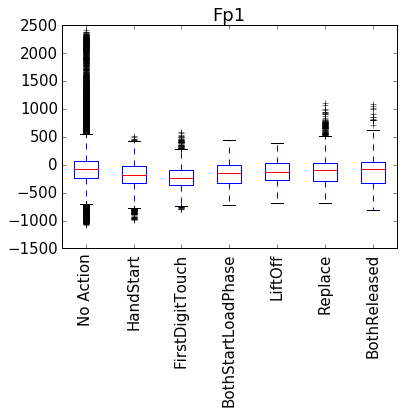

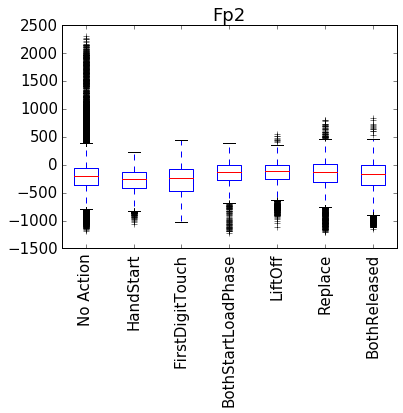

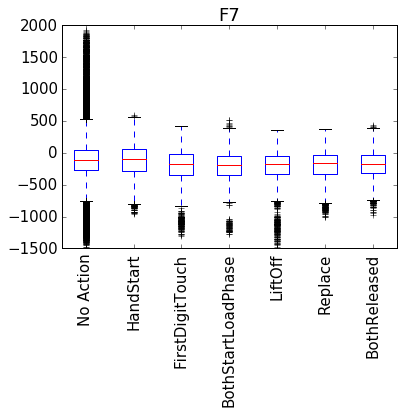

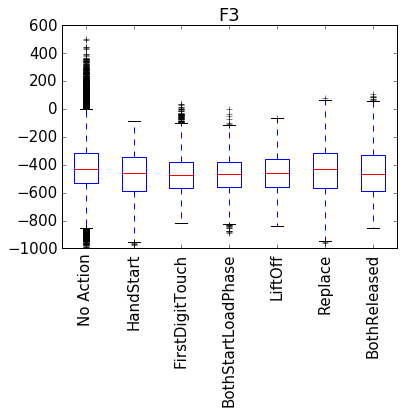

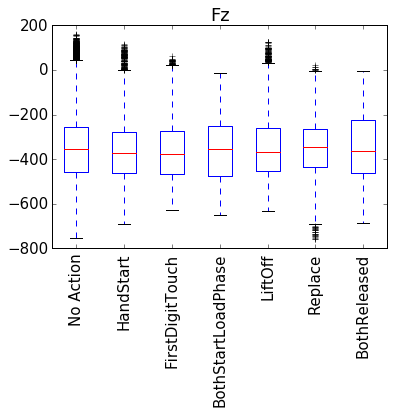

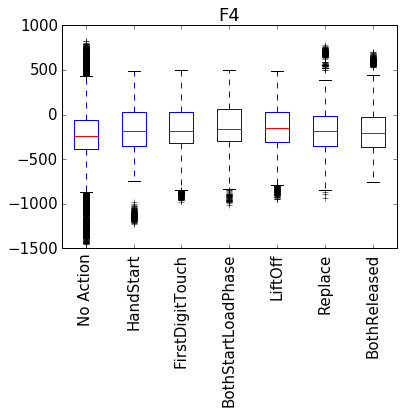

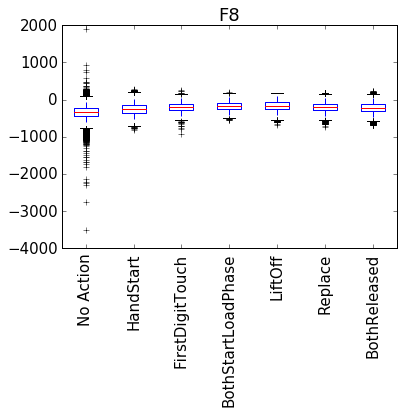

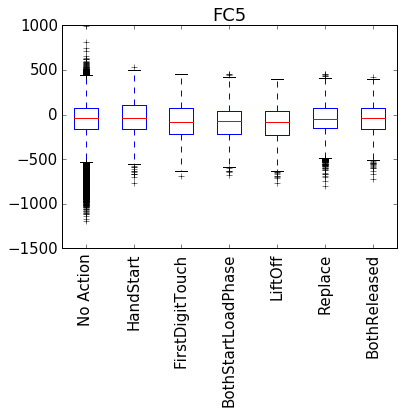

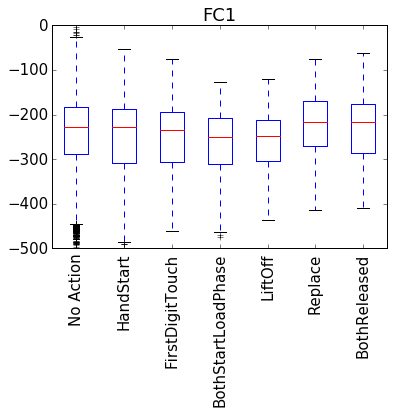

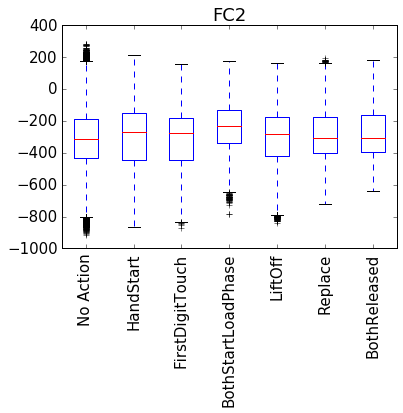

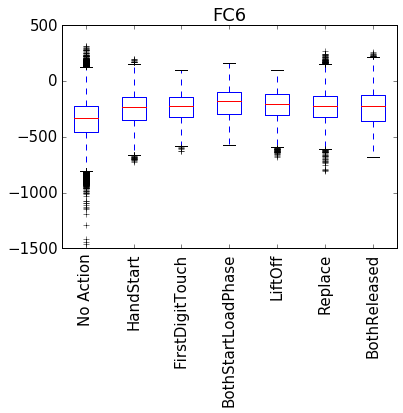

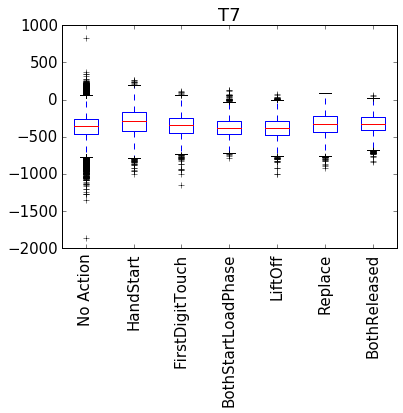

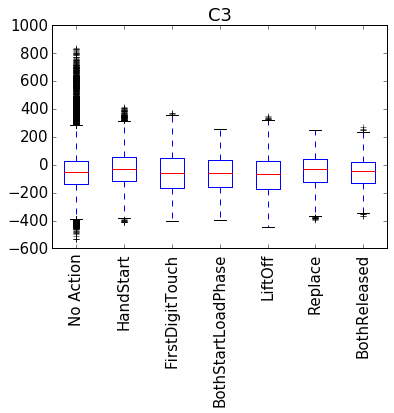

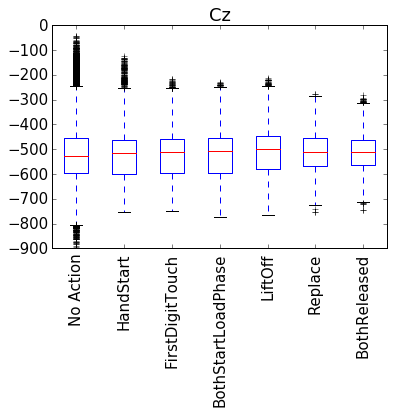

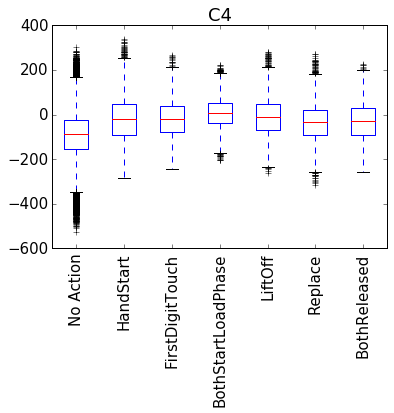

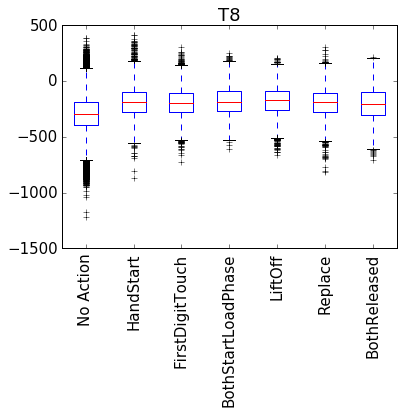

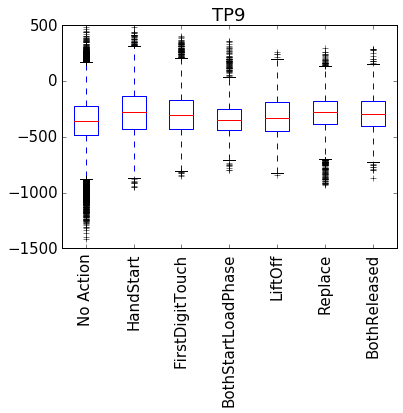

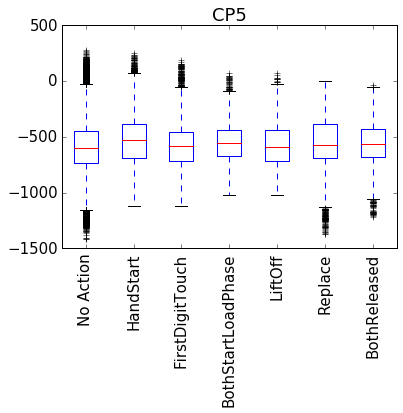

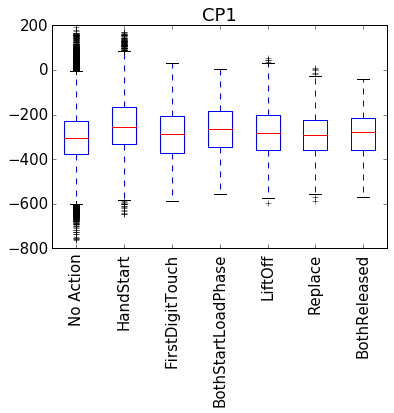

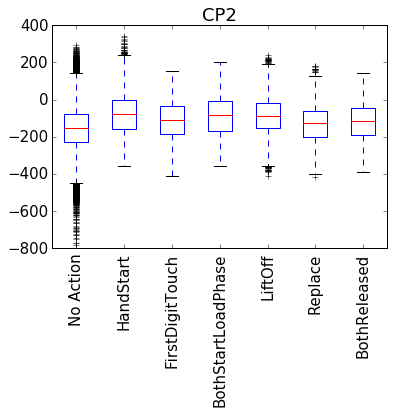

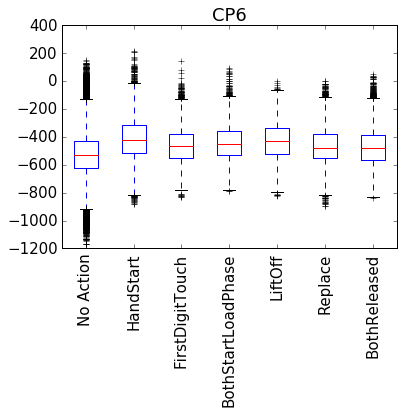

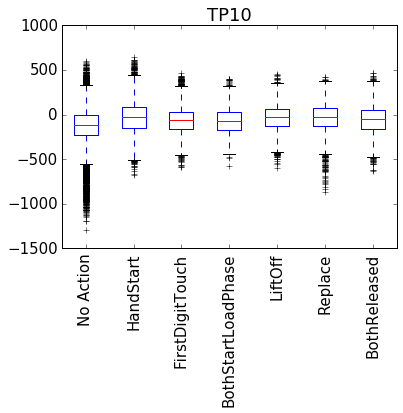

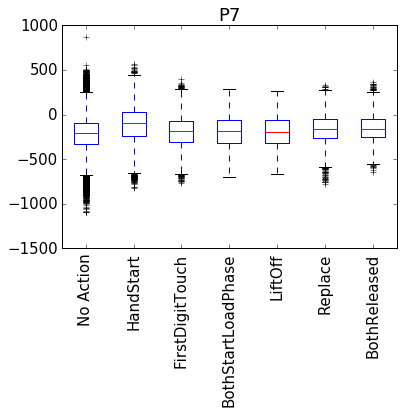

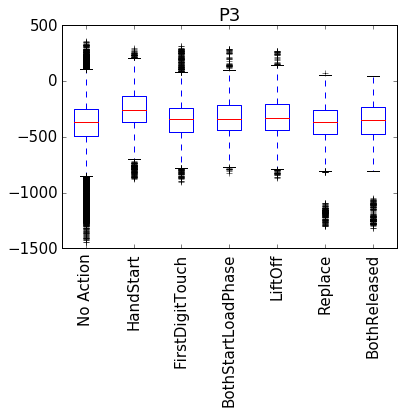

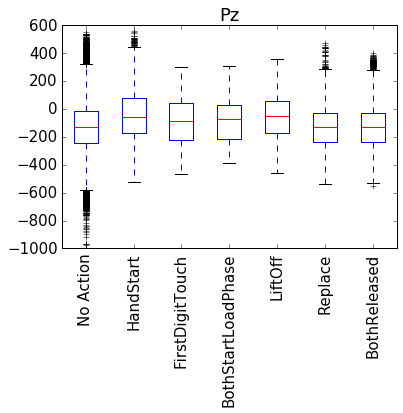

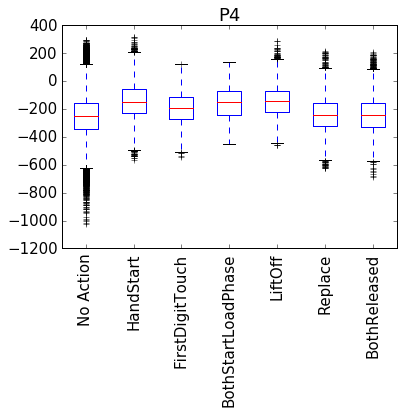

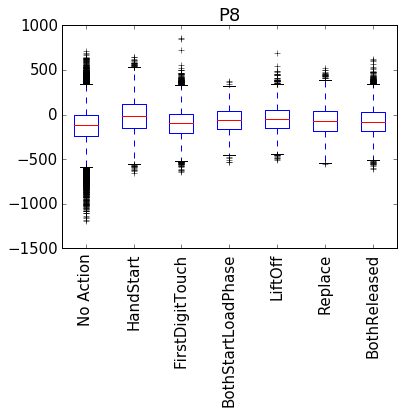

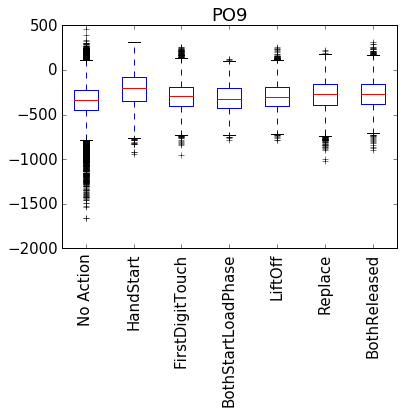

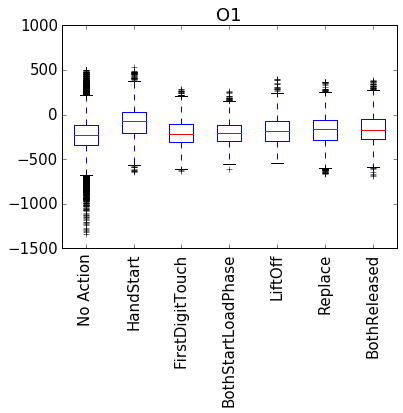

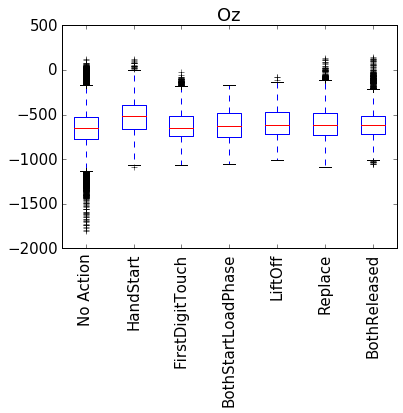

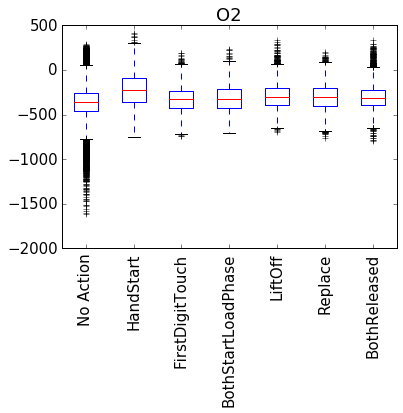

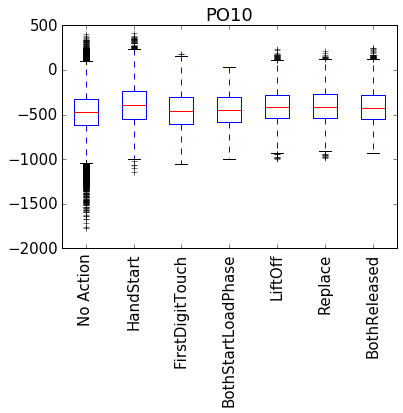

In [13]:
# distribution of the columns in the data split by features
num_classes = 7 # 6 activities plus no activity

for feature in series.columns:
    feature_by_label = []
    for i in range(num_classes):
        # for each class label, get the rows where the class happened
        indexes = np.where(labels == i)[0]
        feature_by_label.append(series[feature].values[indexes])
    plt.boxplot(feature_by_label)
    plt.title(feature)
    plt.xticks(locations[1:], names[:-1], rotation='vertical')
    plt.show()
    plt.close()

In [14]:
#logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

X = series.values
lr.fit(X, labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [15]:
# lr.predict_proba gives a probability for each class
y_prob = lr.predict_proba(X)
y_prob



array([[  9.69030767e-01,   2.83247409e-03,   3.22753765e-03, ...,
          4.38420340e-04,   1.73165461e-02,   7.09787248e-03],
       [  9.75979416e-01,   2.74797577e-03,   4.03760333e-03, ...,
          7.92280302e-04,   1.19228965e-02,   4.47197138e-03],
       [  9.76057968e-01,   5.00243164e-03,   3.74786852e-03, ...,
          6.15290853e-04,   9.85345886e-03,   4.68522471e-03],
       ..., 
       [  9.56828312e-01,   2.06609044e-03,   8.84217506e-03, ...,
          7.05134924e-03,   1.60421320e-02,   7.74687808e-03],
       [  9.60403069e-01,   2.69932555e-03,   7.36989446e-03, ...,
          7.54152457e-03,   1.41008129e-02,   6.61755289e-03],
       [  9.60595008e-01,   3.99224423e-03,   8.33213695e-03, ...,
          7.16814263e-03,   1.11015132e-02,   7.41865523e-03]])

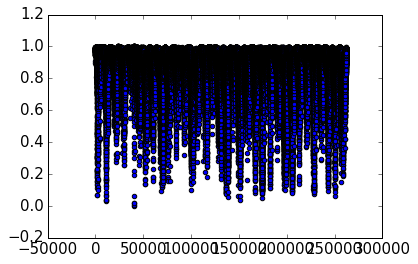

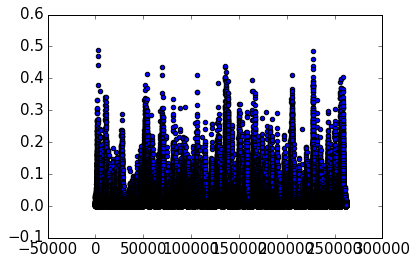

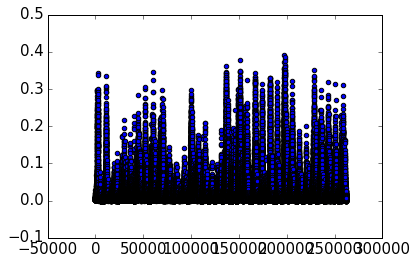

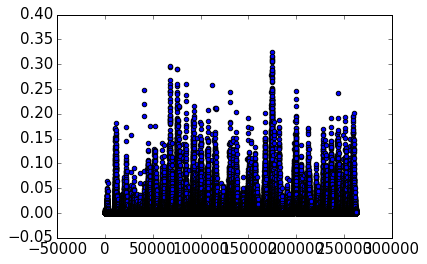

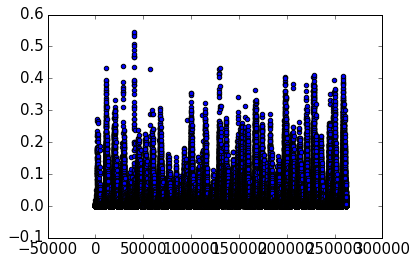

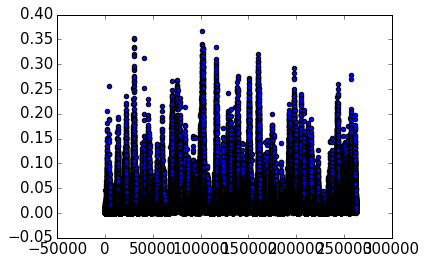

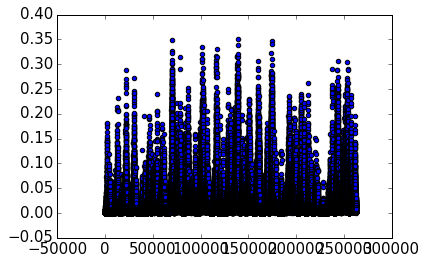

In [16]:
for i in range(num_classes):
    plt.scatter(np.arange(len(X)), y_prob[:, i])
    plt.show()
    plt.close()


In [18]:
from sklearn.metrics import roc_auc_score 

for i in range(num_classes):
    y_true = (1 * (labels == i))
    print(names[i], ": ", roc_auc_score(y_true, y_prob[:, i]), sep='')


No Action: 0.802996341292
HandStart: 0.830014002445
FirstDigitTouch: 0.850181895369
BothStartLoadPhase: 0.906403151617
LiftOff: 0.867504993261
Replace: 0.815856587863
BothReleased: 0.817076092568


In [20]:
def extract_features(ts):
    """
    ts is the time series of labels as a numpy array
    """
    last_state = 0
    last_state_nz = 6
    time_since_last_nz = 2
    duration_of_cur_state = 1
    X = []
    for i in range(len(ts)):
        cur_state = ts[i]
        X.append([last_state, last_state_nz, time_since_last_nz, duration_of_cur_state])
        
        if last_state == cur_state:
            duration_of_cur_state += 1
        else:
            duration_of_cur_state = 0
        if cur_state != 0:
            last_state_nz = cur_state
            time_since_last_nz = 1
        else:
            time_since_last_nz += 1
        last_state = cur_state
    X = np.array(X)
    return X

X = extract_features(labels)

lr = LogisticRegression()
lr.fit(X, labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

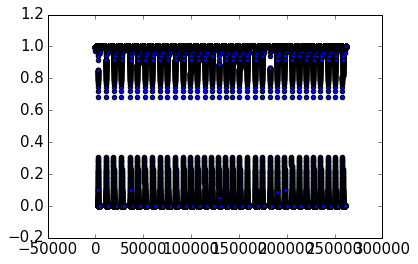

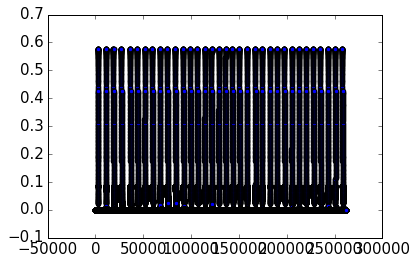

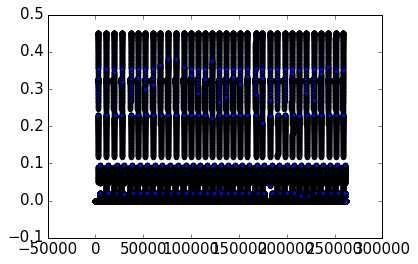

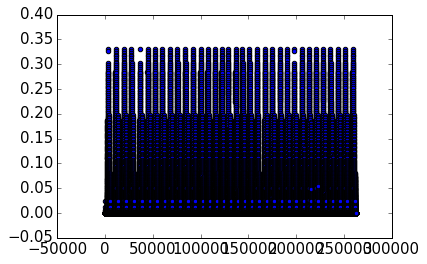

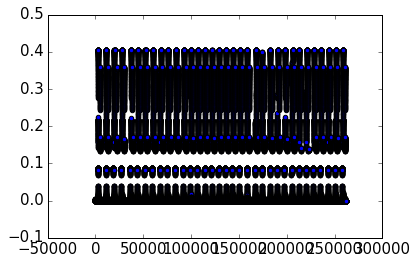

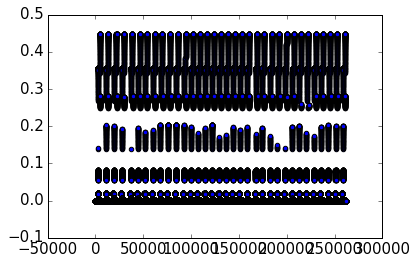

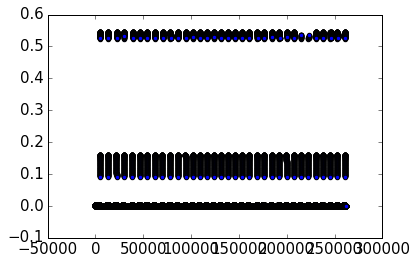

In [21]:
y_prob = lr.predict_proba(X)

for i in range(num_classes):
    plt.scatter(np.arange(len(X)), y_prob[:, i])
    plt.show()
    plt.close()

In [22]:
from sklearn.metrics import roc_auc_score

for i in range(num_classes):
    y_true = (1 * (labels == i))
    print(names[i], ": ", roc_auc_score(y_true, y_prob[:, i]), sep='')

No Action: 0.998338889185
HandStart: 0.994389430221
FirstDigitTouch: 0.997093487649
BothStartLoadPhase: 0.989141280364
LiftOff: 0.995711151228
Replace: 0.998271724405
BothReleased: 0.999204083909


In [23]:
from sklearn.metrics import precision_recall_fscore_support
y_true = labels
y_pred = np.argmax(y_prob, axis=1)
prec, rec, fscore, supp = precision_recall_fscore_support(y_true, y_pred)
print ("Precision:", ["%.3f" % i for i in prec])
print ("Recall:", ["%.3f" % i for i in rec])
print ("F-1 Score:", ["%.3f" % i for i in fscore])


Precision: ['0.998', '0.886', '0.813', '0.665', '0.861', '0.993', '0.993']
Recall: ['0.999', '0.827', '0.880', '0.313', '0.960', '0.993', '0.993']
F-1 Score: ['0.999', '0.855', '0.845', '0.426', '0.908', '0.993', '0.993']
